In [1]:
import numpy as np
import math
import holoviews as hv
import scipy.sparse.linalg as linalg
#%matplotlib inline
import matplotlib.pyplot as plt

hv.notebook_extension()

In [2]:
dx = 1
L = 600
yslit = int(round(2*L/3))
dk = 2*math.pi/L
k0 = -0.5*L*dk
dt = 0.6
steps = 500

In [3]:
def barrier(L, yslit):
    V = np.zeros(shape =[int(L), int(L)], dtype = 'int')
    V[:int(L/3-1), yslit] = int(10**5)
    V[int(L/3+1):int(2*L/3-1), yslit] = int(10**5)
    V[int(2*L/3+1):, yslit] = int(10**5)
    return V

In [10]:
x = np.arange(0, L, 1)
y = np.arange(0, L, 1)
k = np.arange(0, L, 1)

psi_r = np.zeros(shape = [int(L), int(L), int(steps)]) + 0j

psi_r[:, :, 0] = np.exp(1j*k*x)*np.exp(-0.5*(x-50/100)**2)
psi_k = np.zeros(shape = (int(L), int(L), int(steps)))+0j

#   Normalize wave function
psi_r[:, :, 0] = psi_r[:, :, 0]/np.linalg.norm(psi_r[:, :, 0])

V = barrier(L, yslit)

In [9]:
for i in range (0, steps-1):
    psi_k[:, :, i] = np.fft.fft(psi_r[:, :, i]*np.exp(-1j*k*i)*np.exp(-dt*V*1j))
    psi_r[:, :, i+1] = np.fft.ifft(psi_k[:, :, i] *np.exp(-dt*1j*k**2))

b':HoloMap   [Time]\n   :Overlay\n      .Curve.I  :Curve   [x]   (y)\n      .Curve.II :Curve   [x]   (y)'
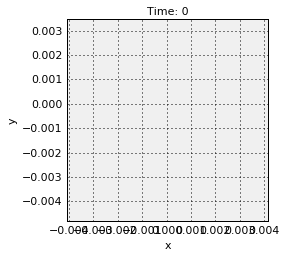
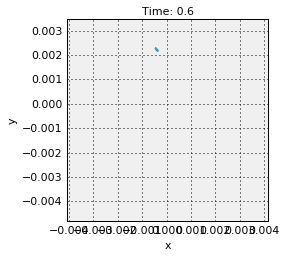
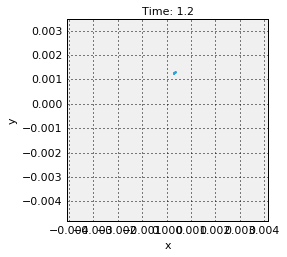
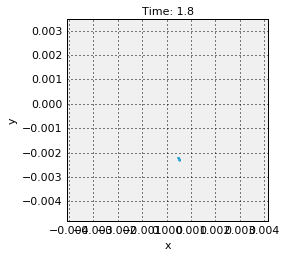
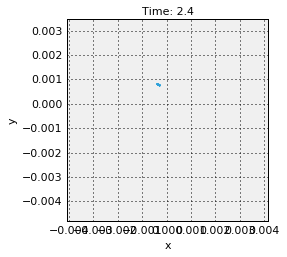
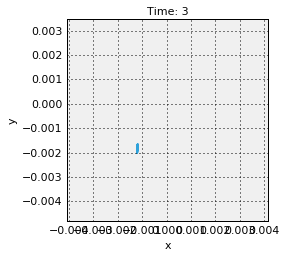
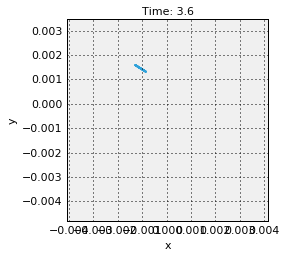
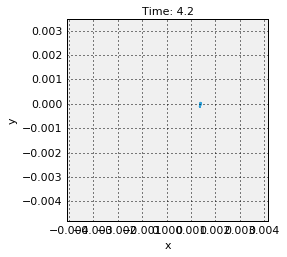
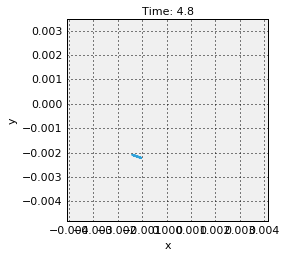
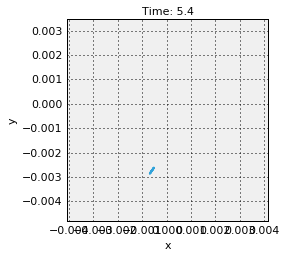
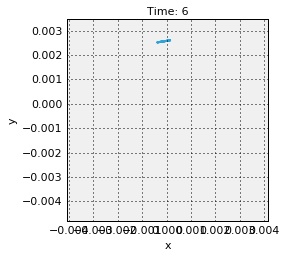
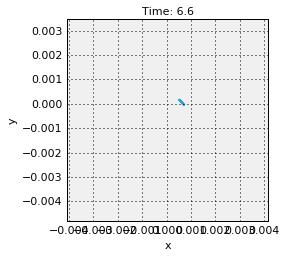
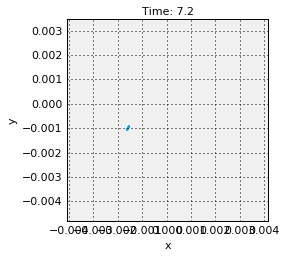
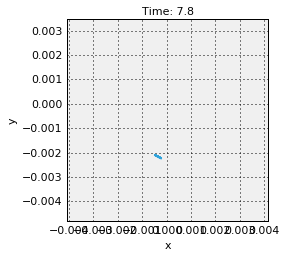
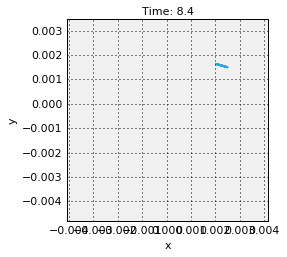
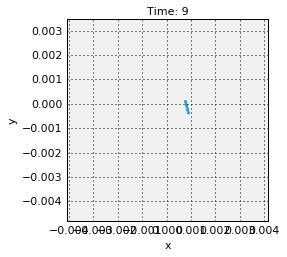
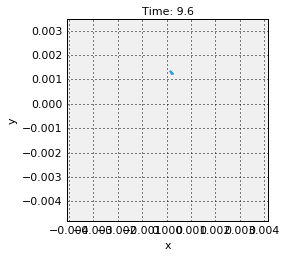
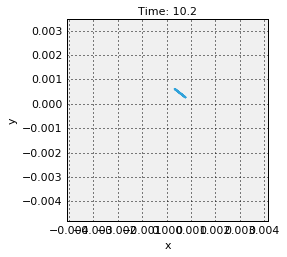
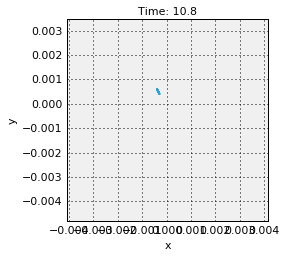
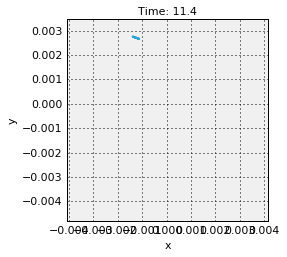
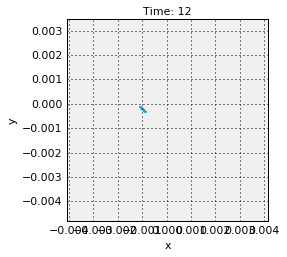
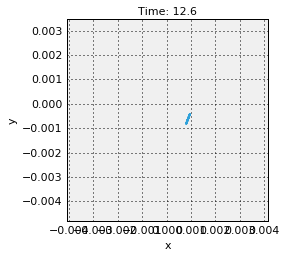
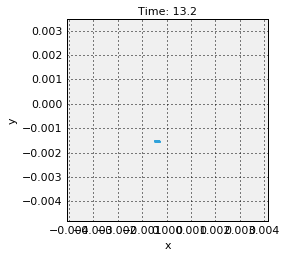
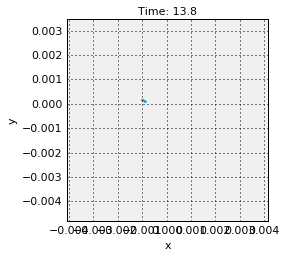
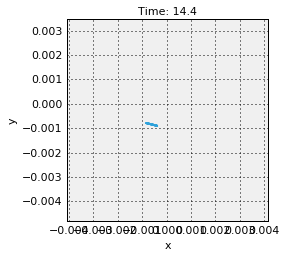
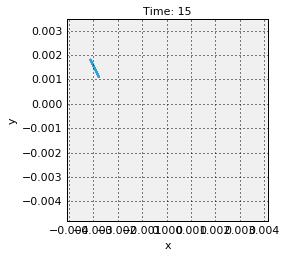
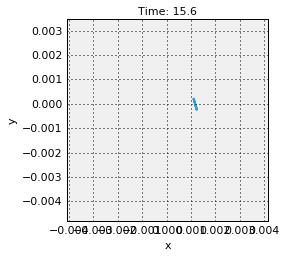
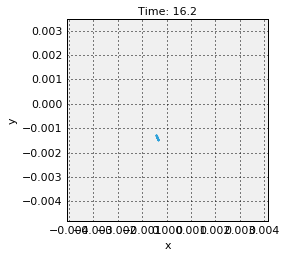
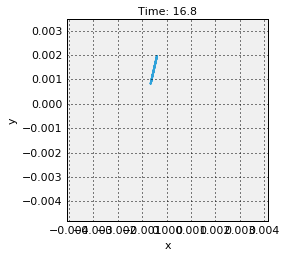
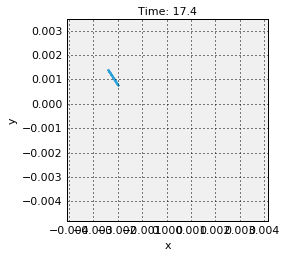
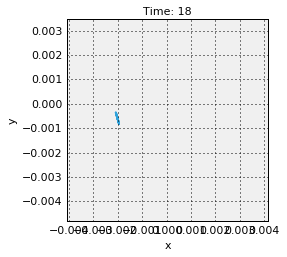
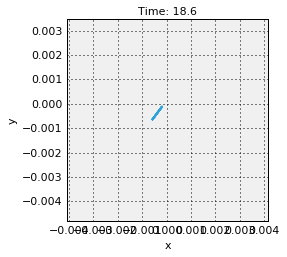
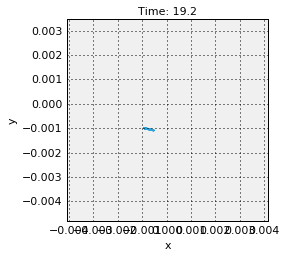
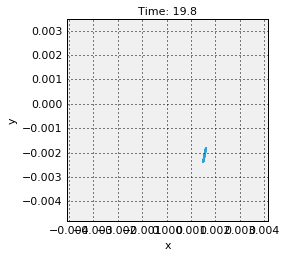
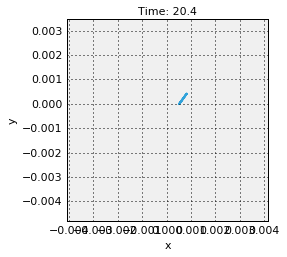
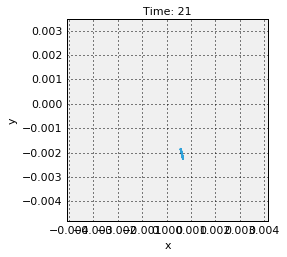
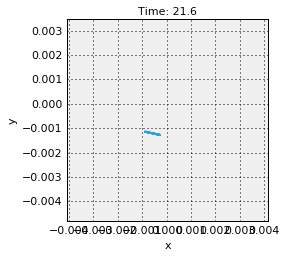
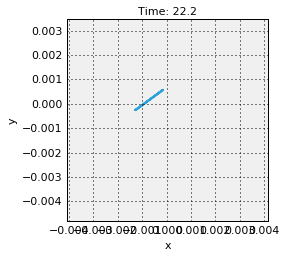
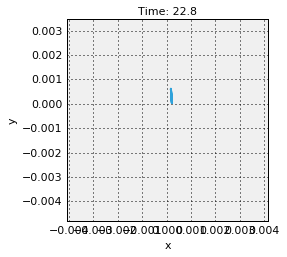
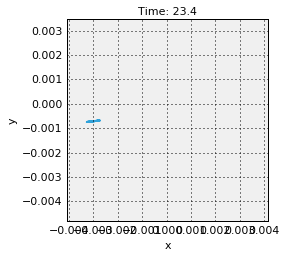
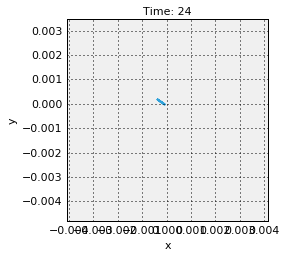
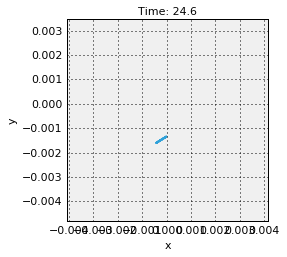
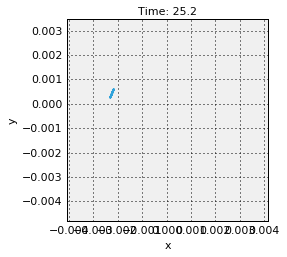
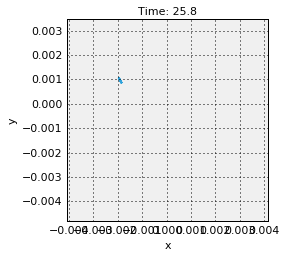
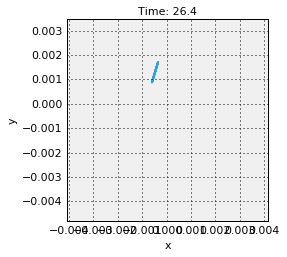
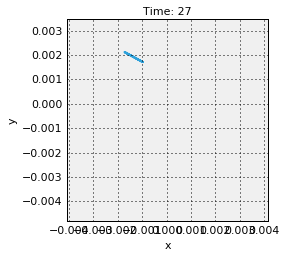
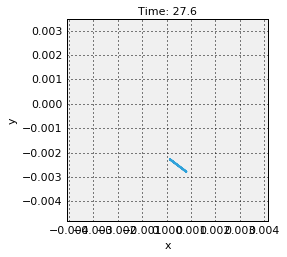
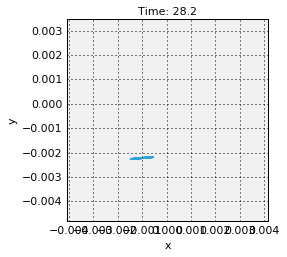
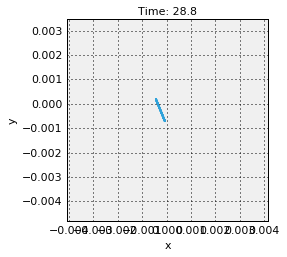
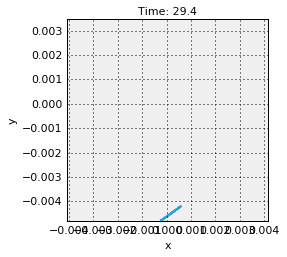
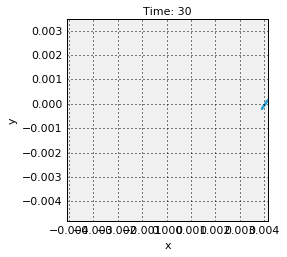
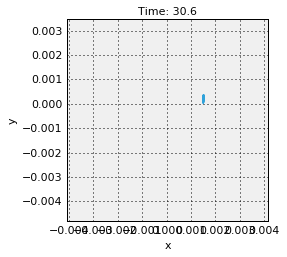
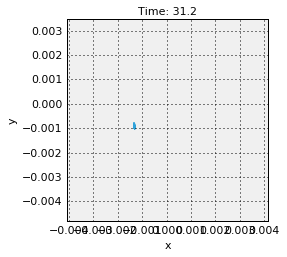
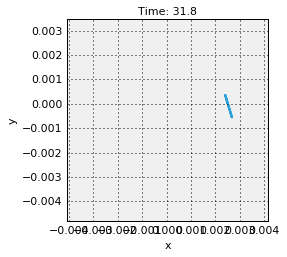
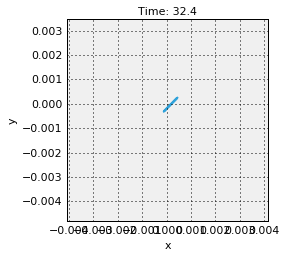
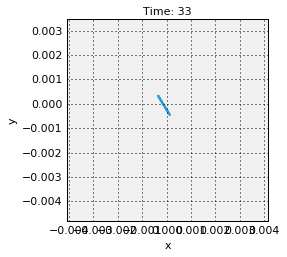
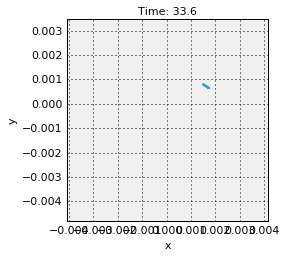
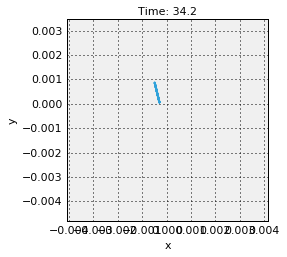
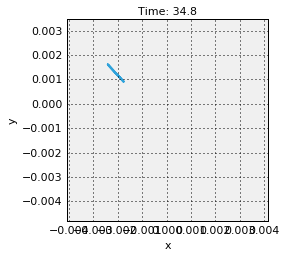
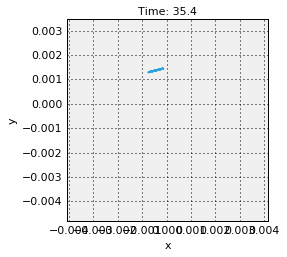
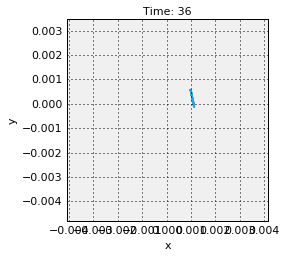
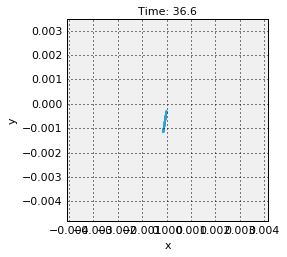
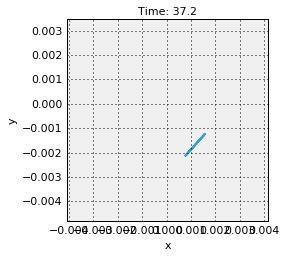
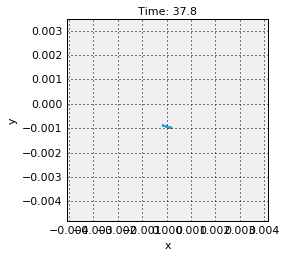
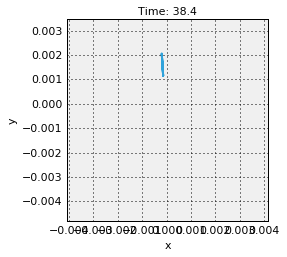
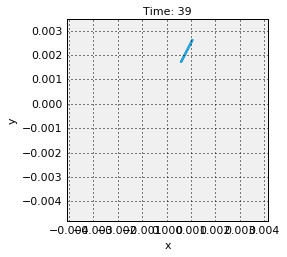
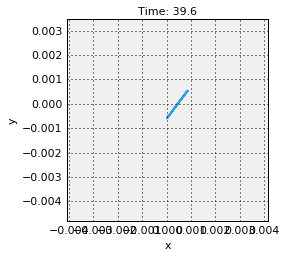
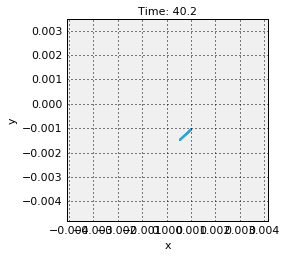
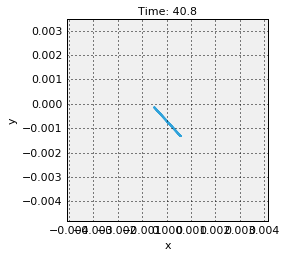
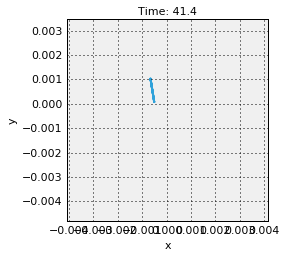
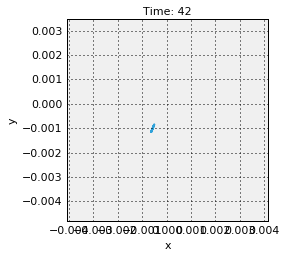
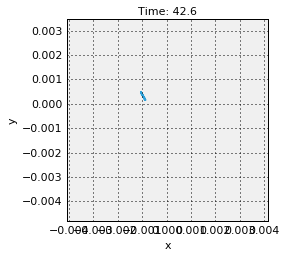
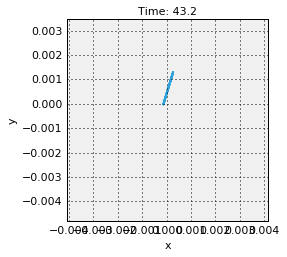
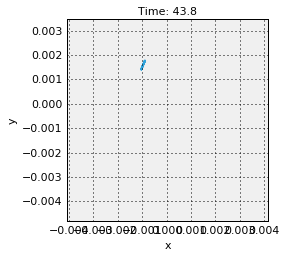
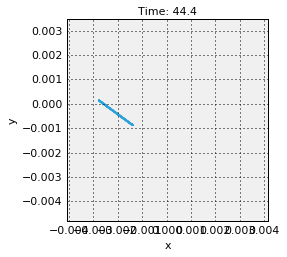
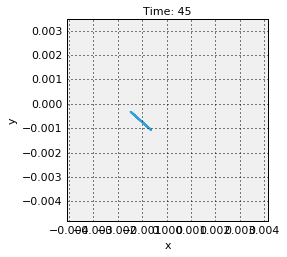
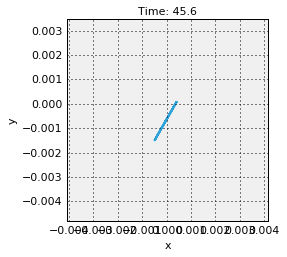
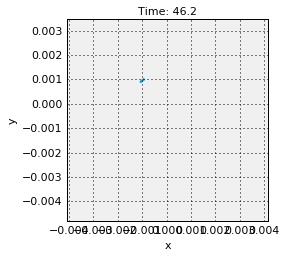
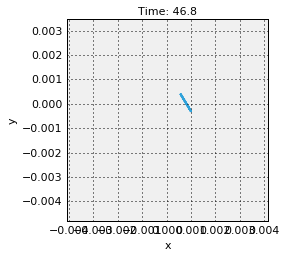
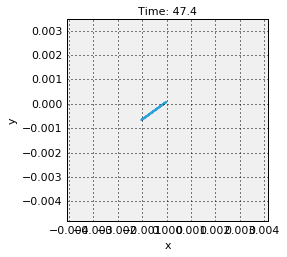
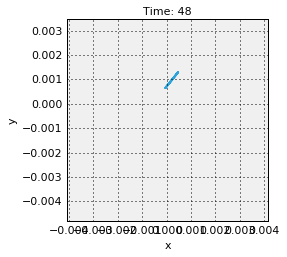
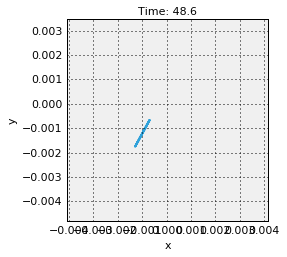
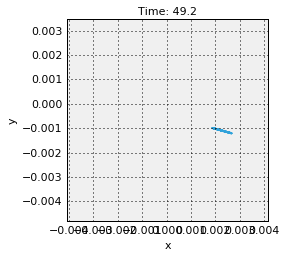
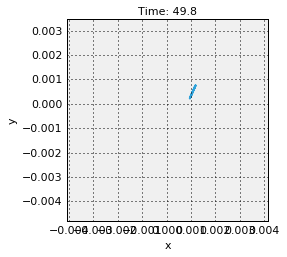
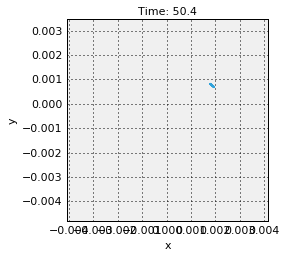
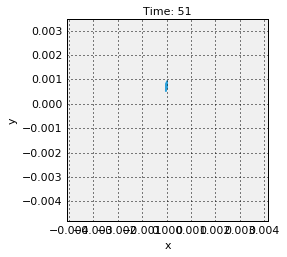
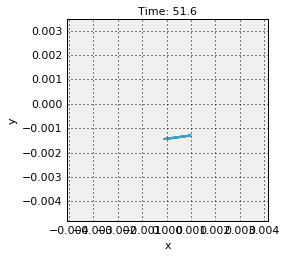
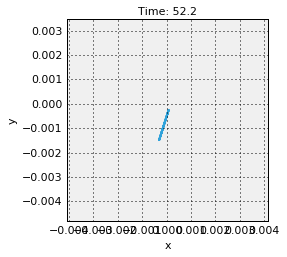
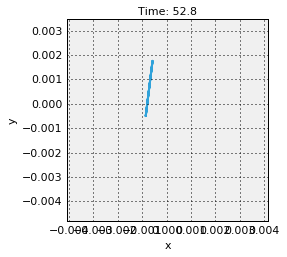
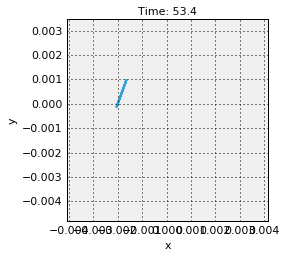
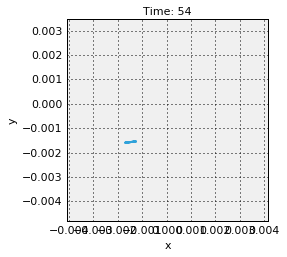
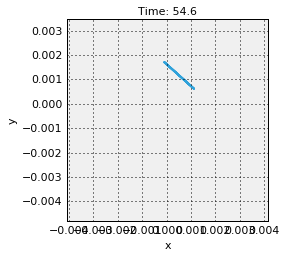
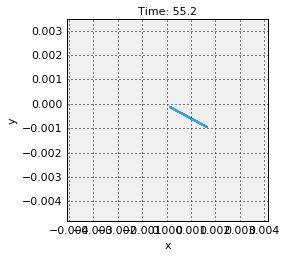
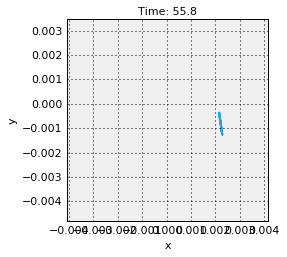
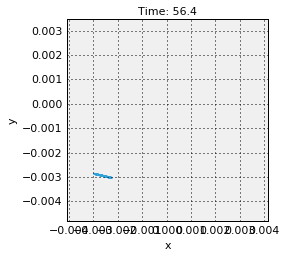
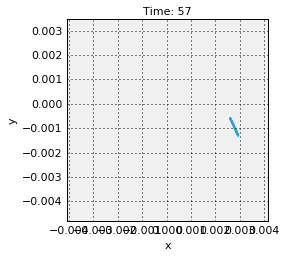
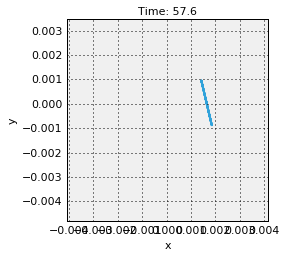
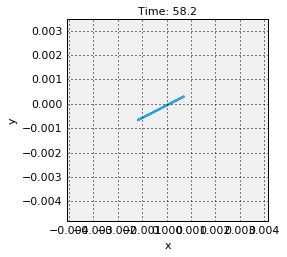
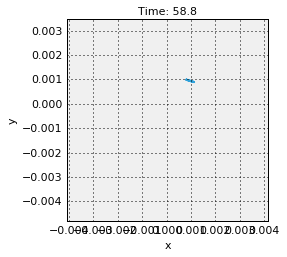
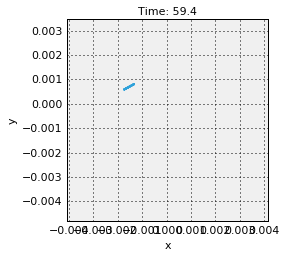
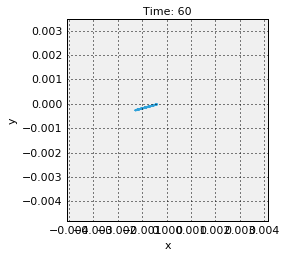
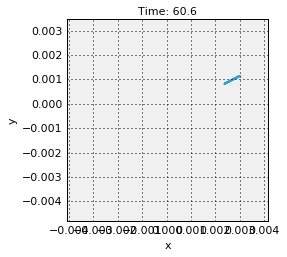
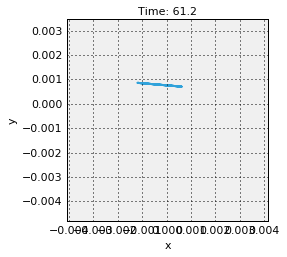
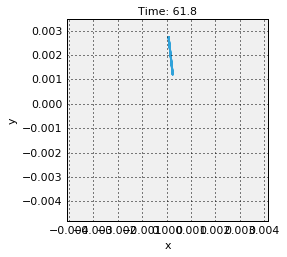
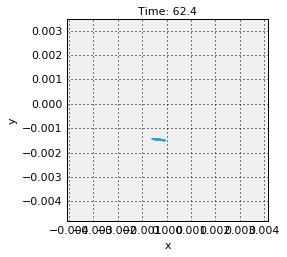
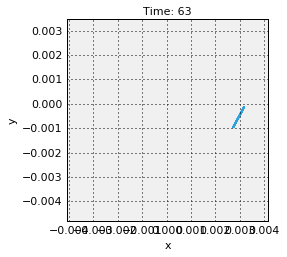
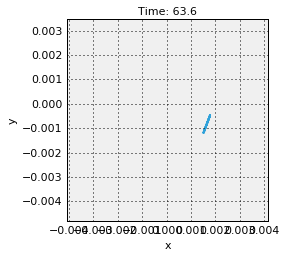
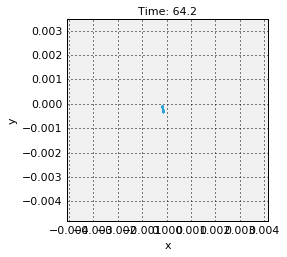
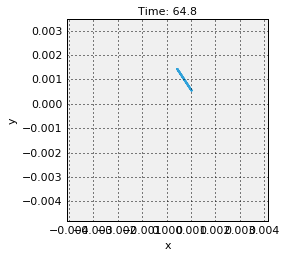
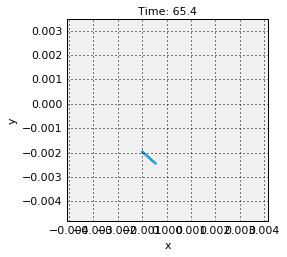
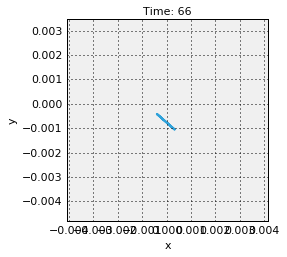
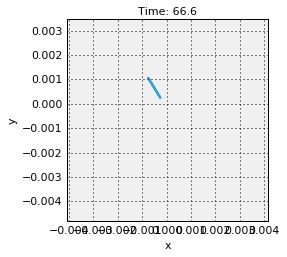
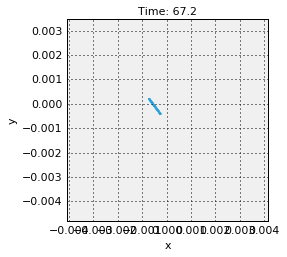
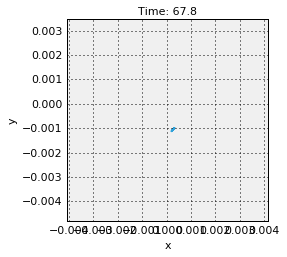
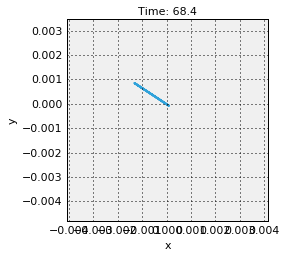
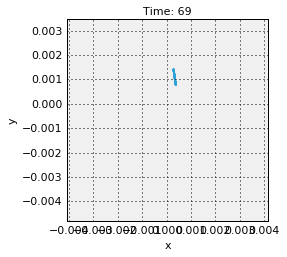
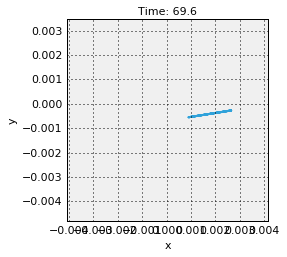
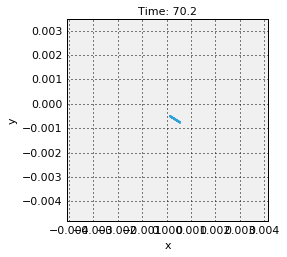
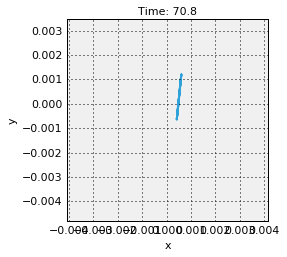
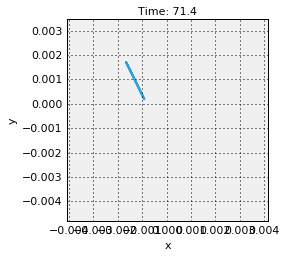
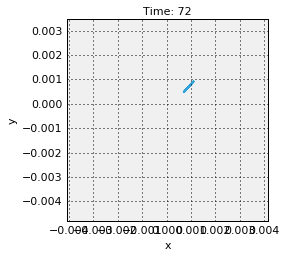
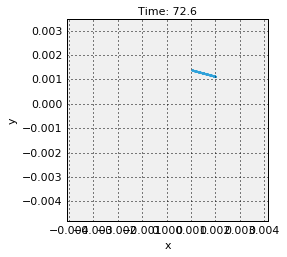
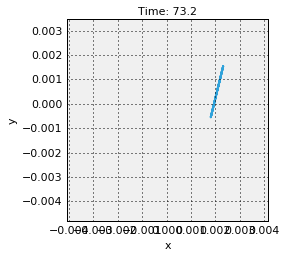
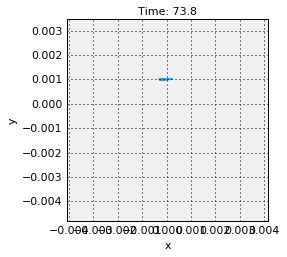
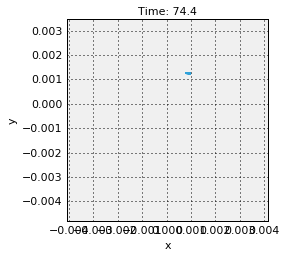
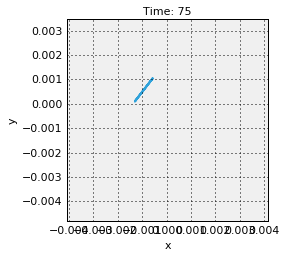
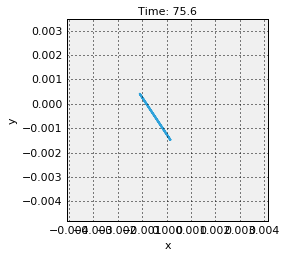
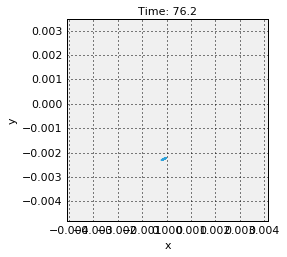
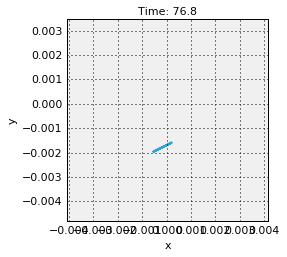
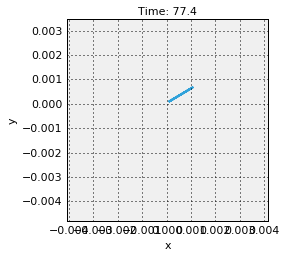
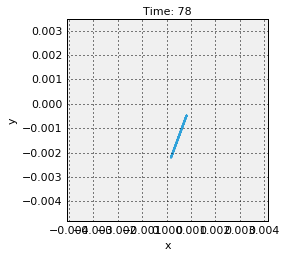
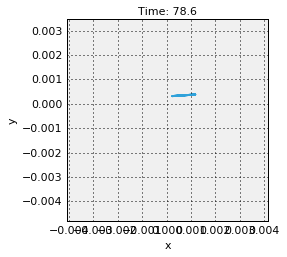
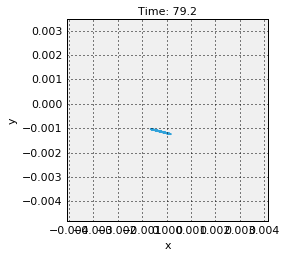
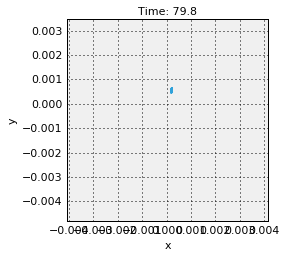
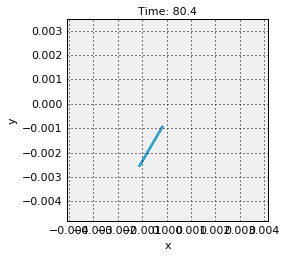
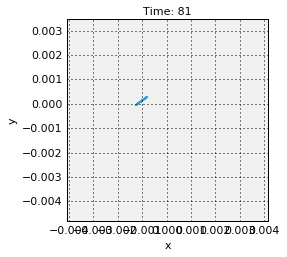
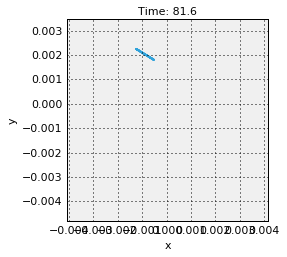
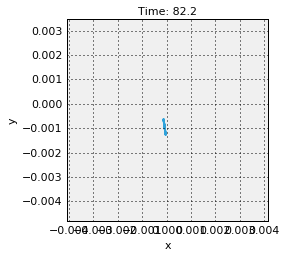
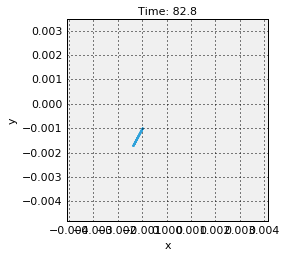
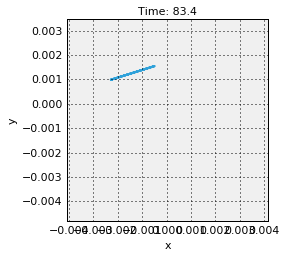
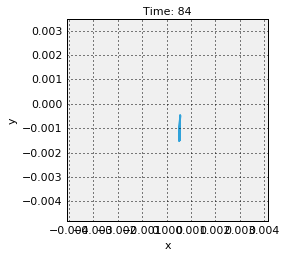
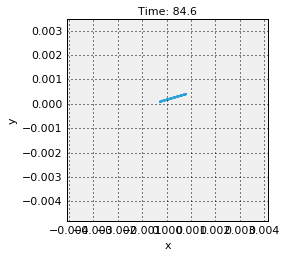
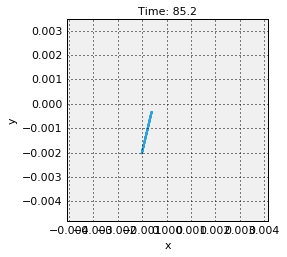
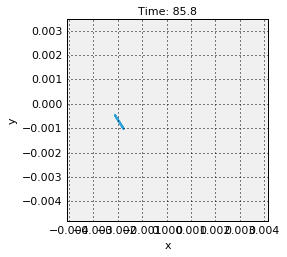
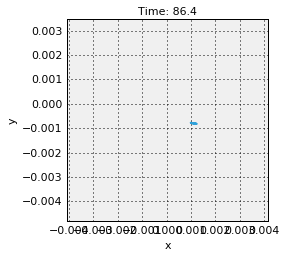
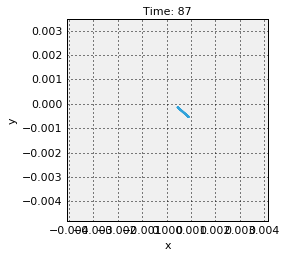
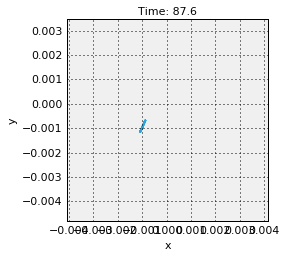
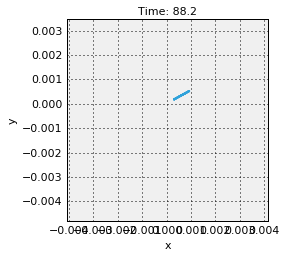
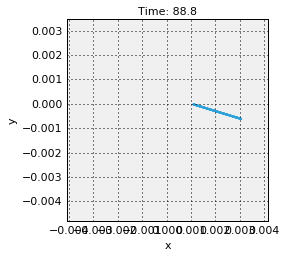
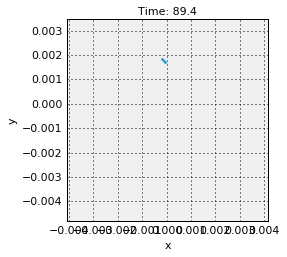
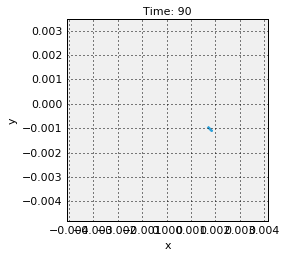
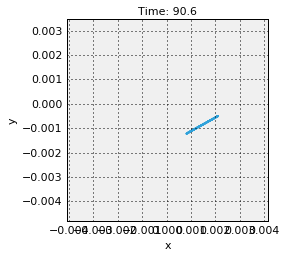
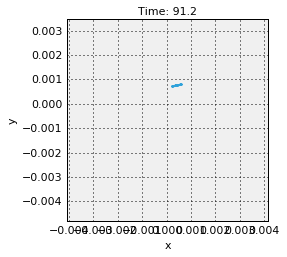
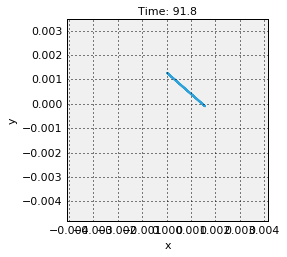
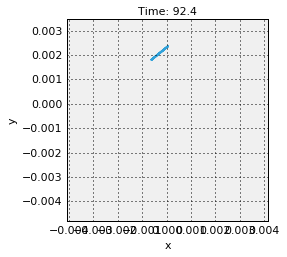
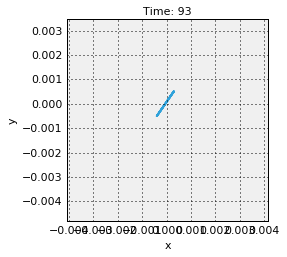
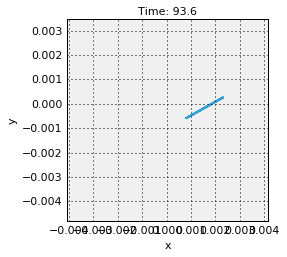
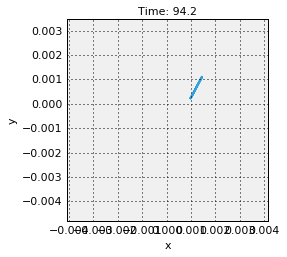
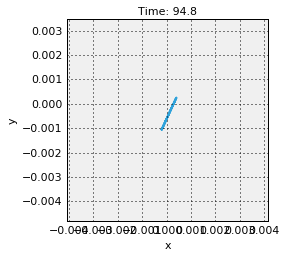
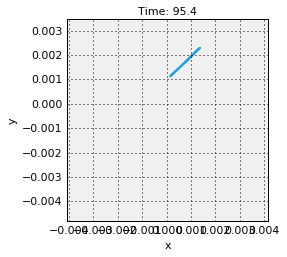
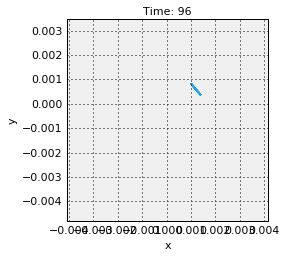
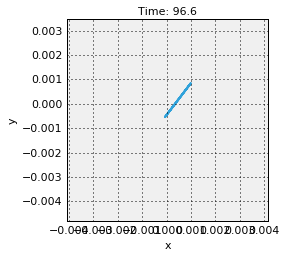
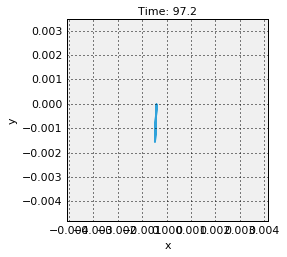
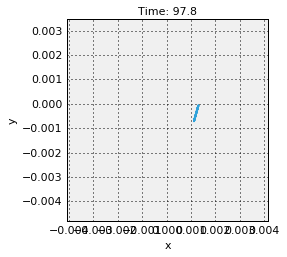
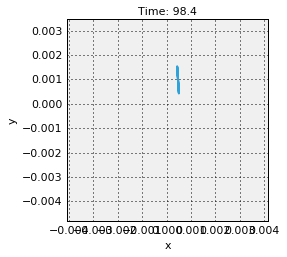
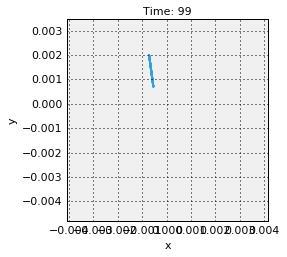
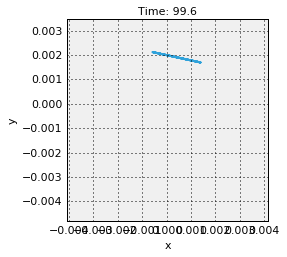
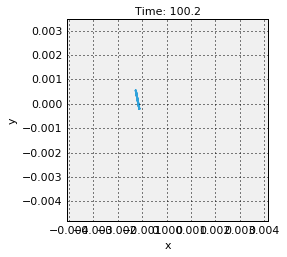
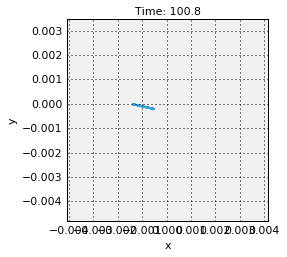
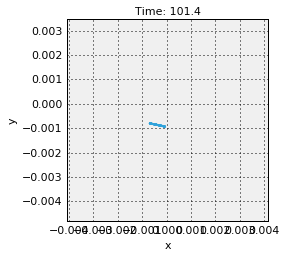
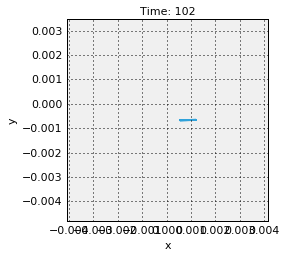
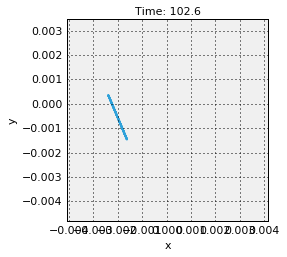
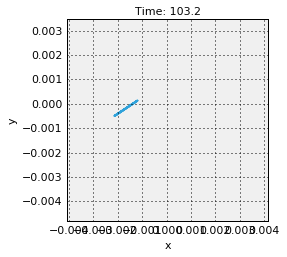
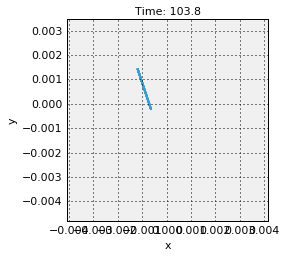
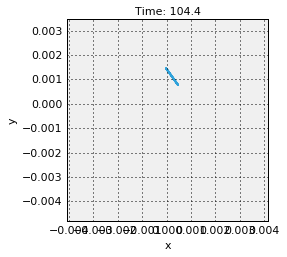
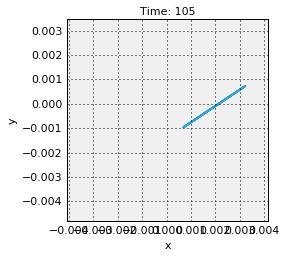
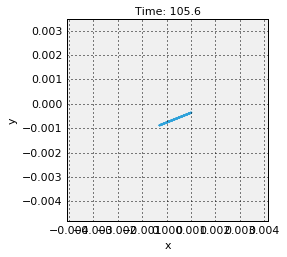
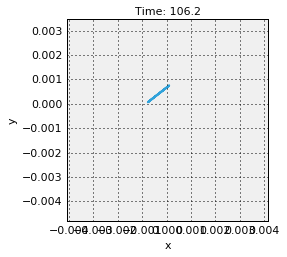
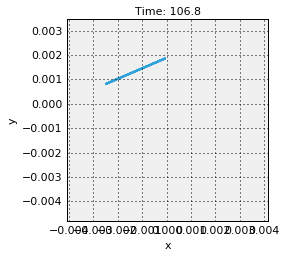
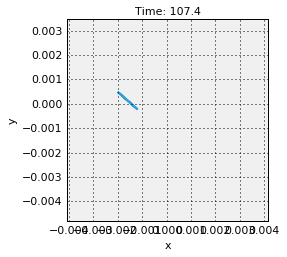
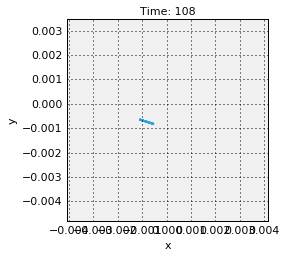
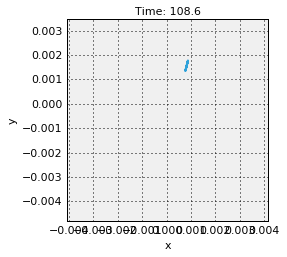
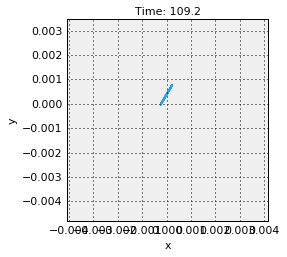
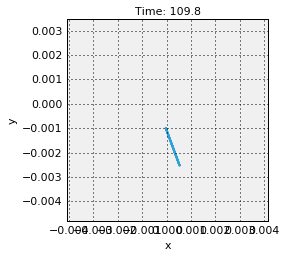
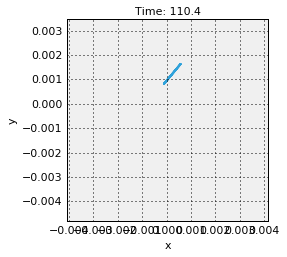
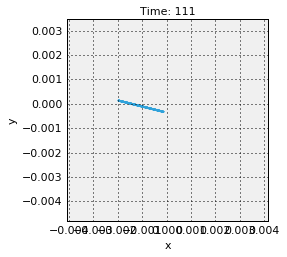
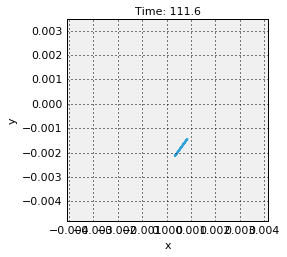
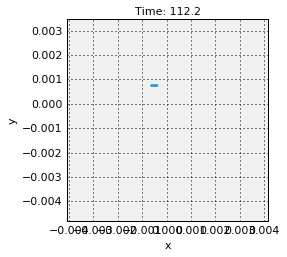
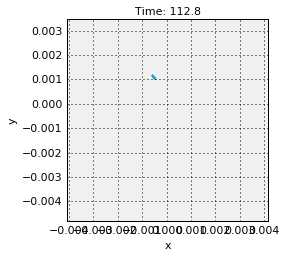
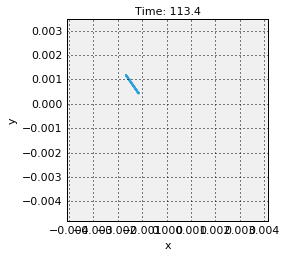
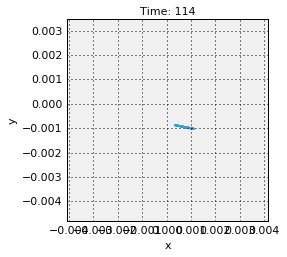
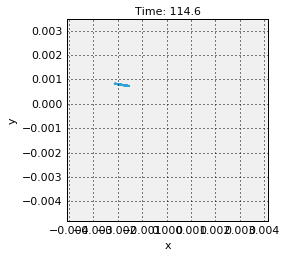
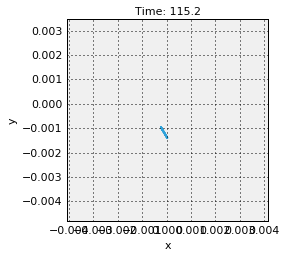
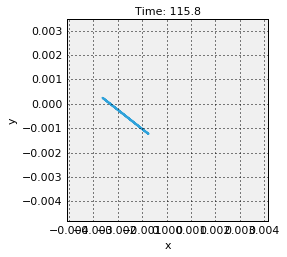
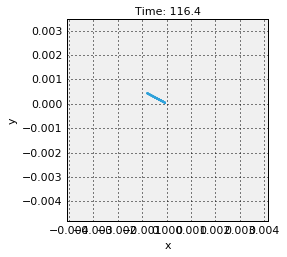
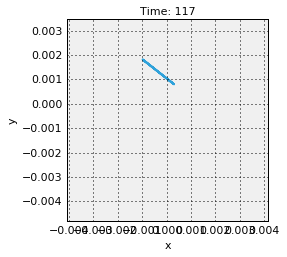
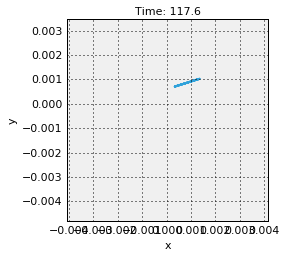
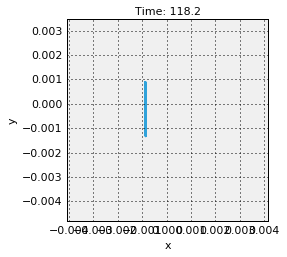
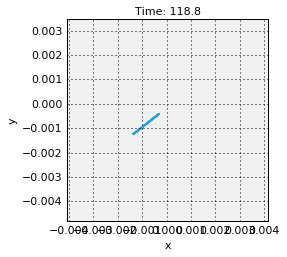
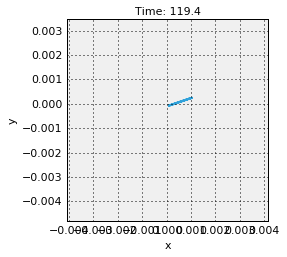
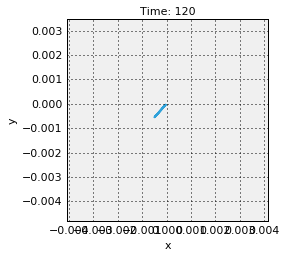
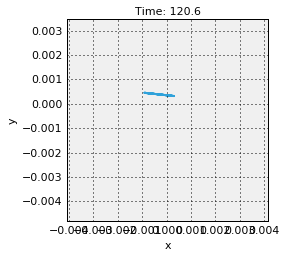
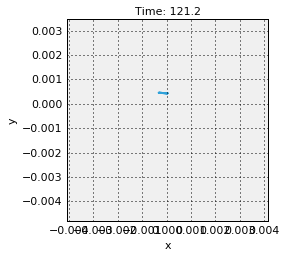
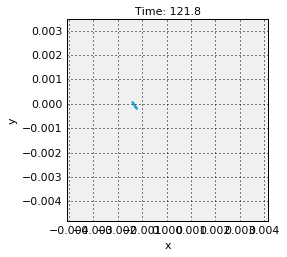
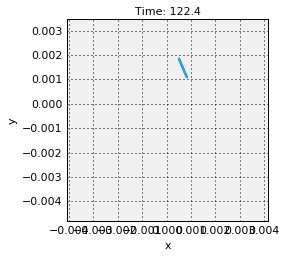
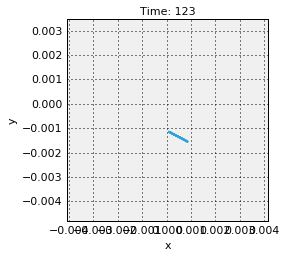
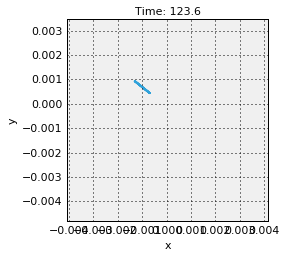
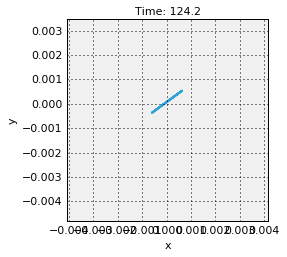
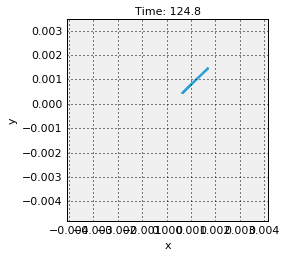
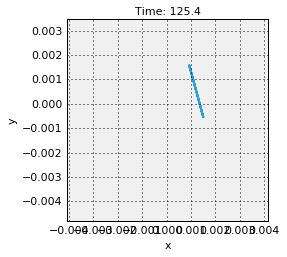
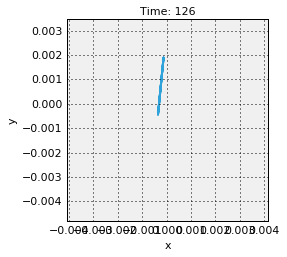
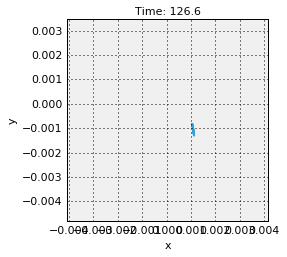
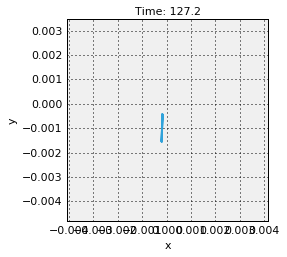
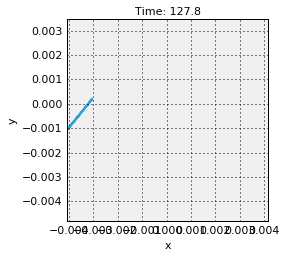
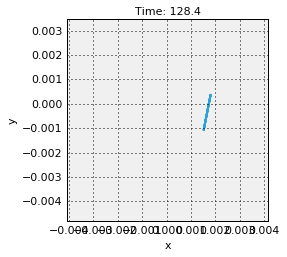
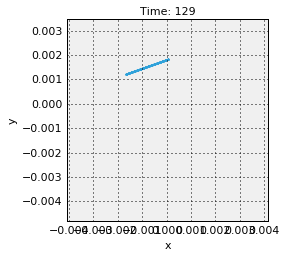
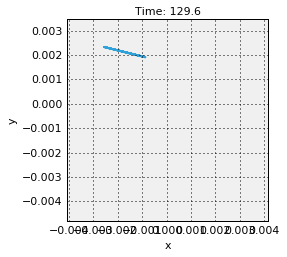
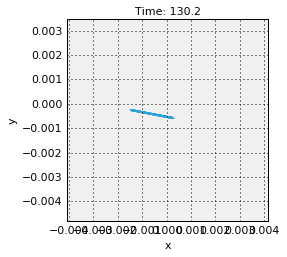
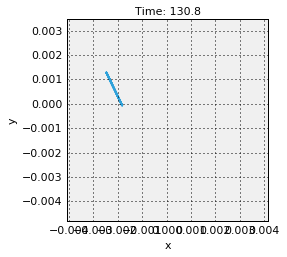
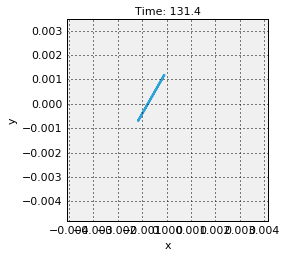
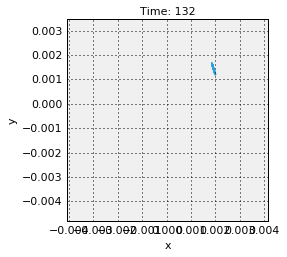
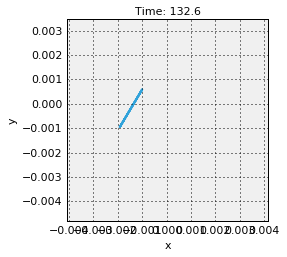
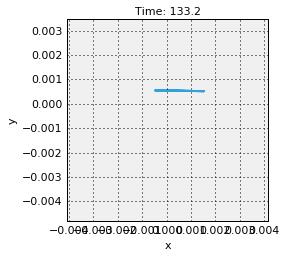
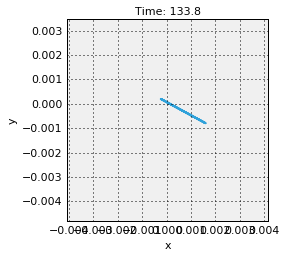
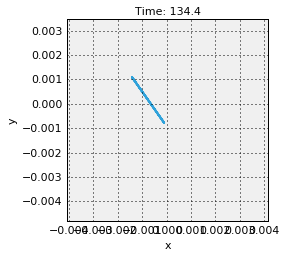
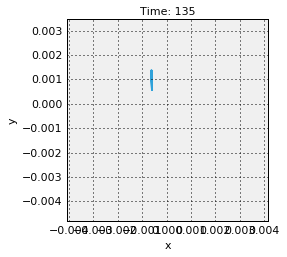
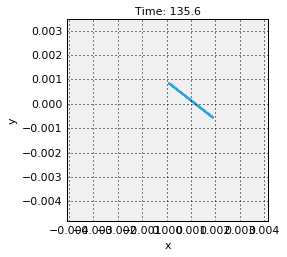
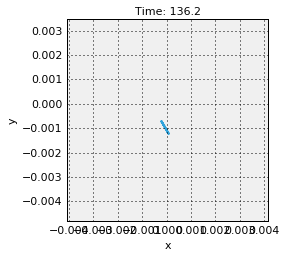
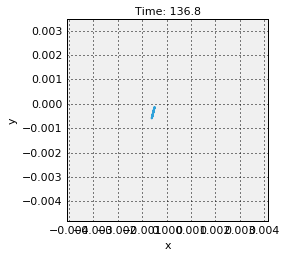
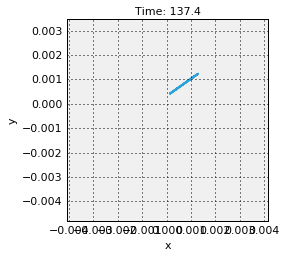
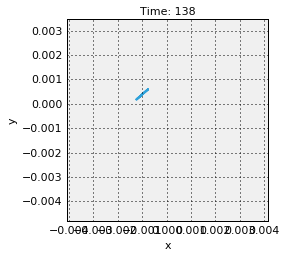
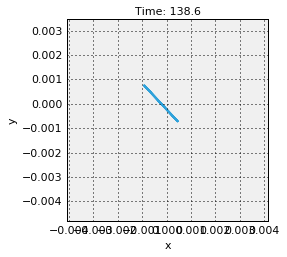
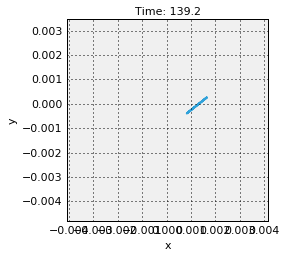
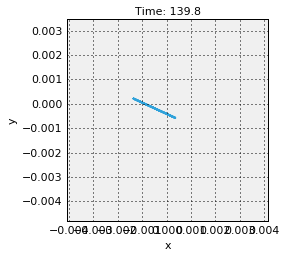
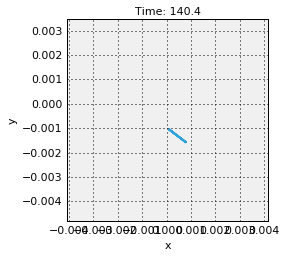
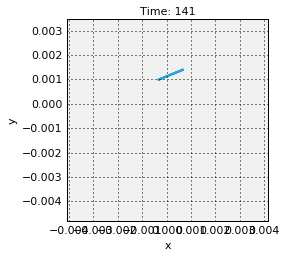
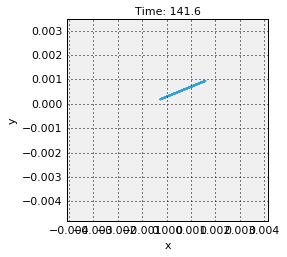
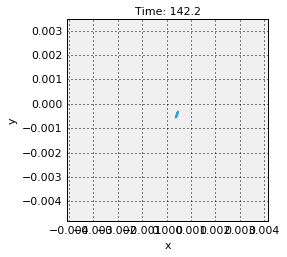
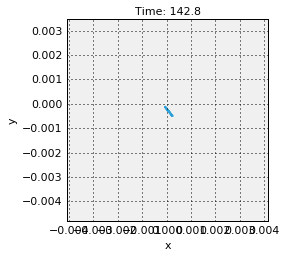
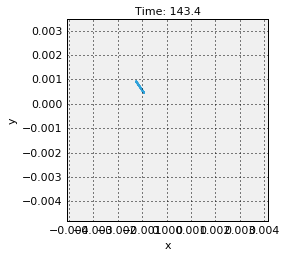
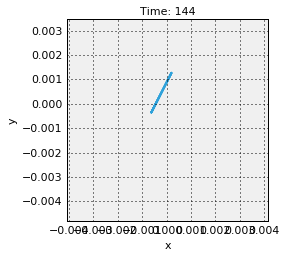
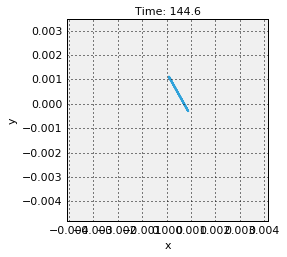
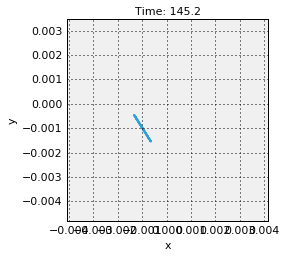
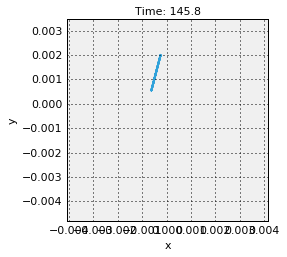
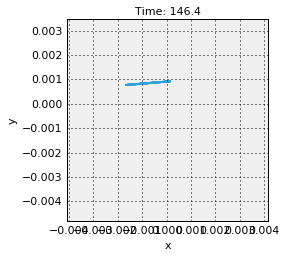
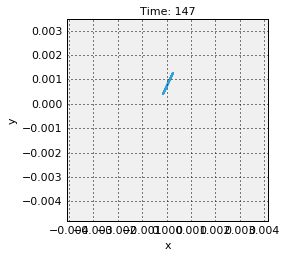
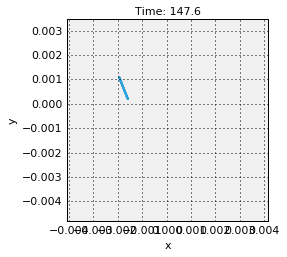
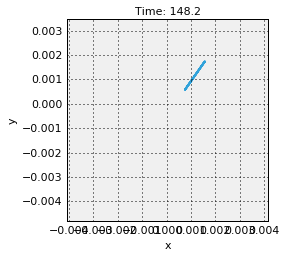
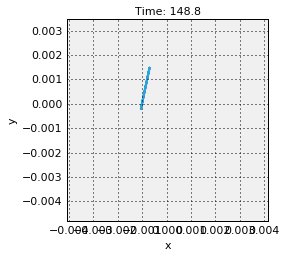
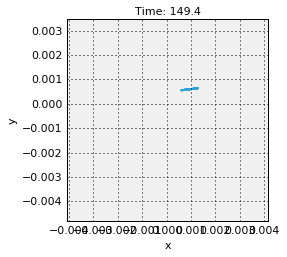
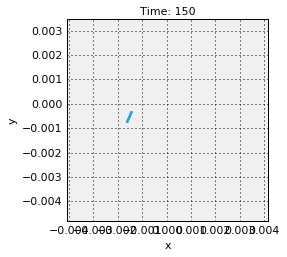
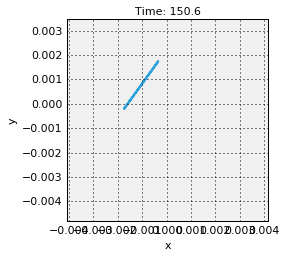
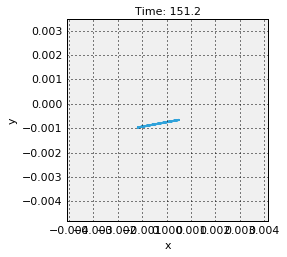
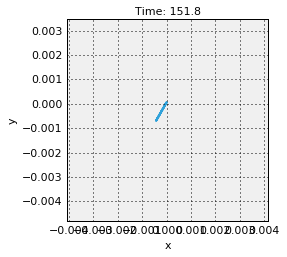
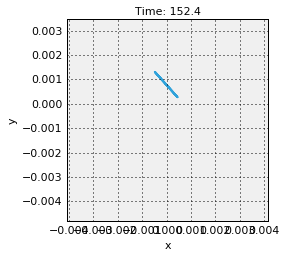
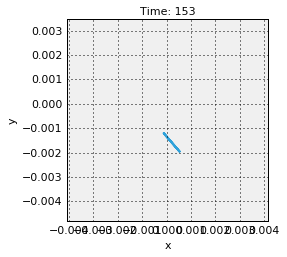
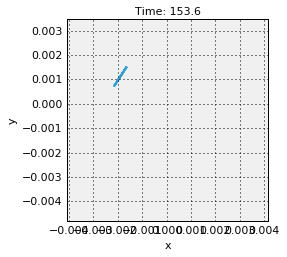
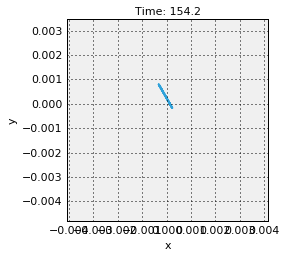
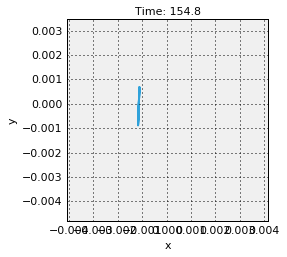
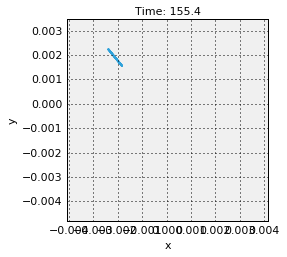
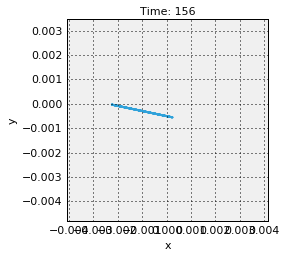
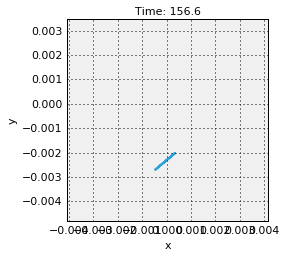
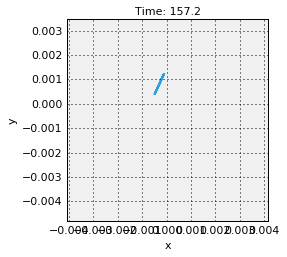
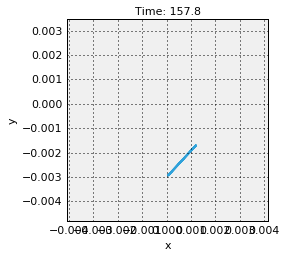
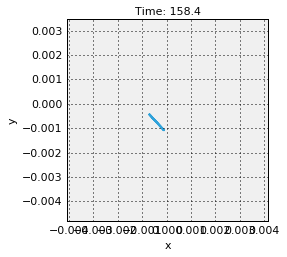
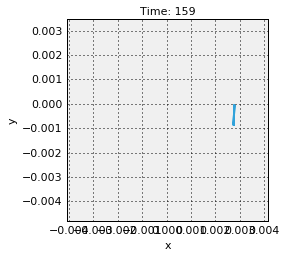
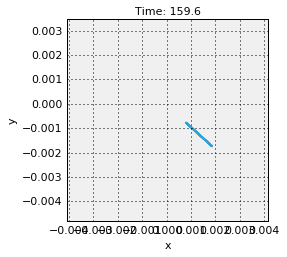
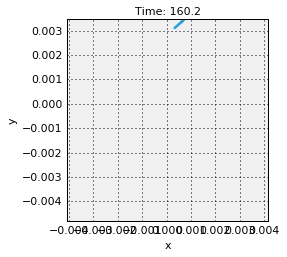
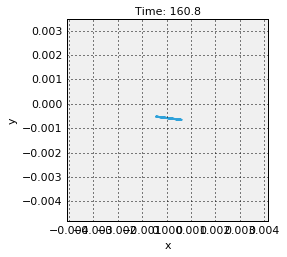
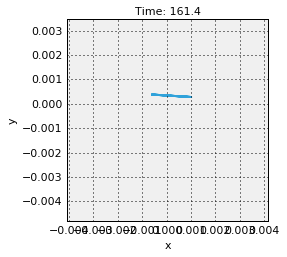
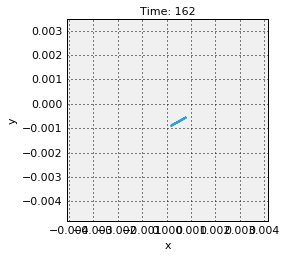
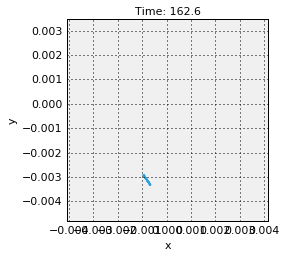
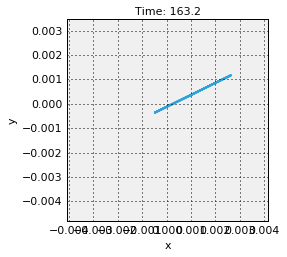
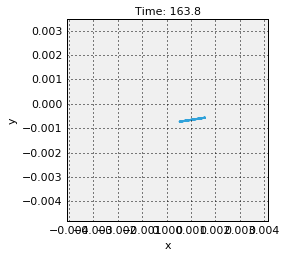
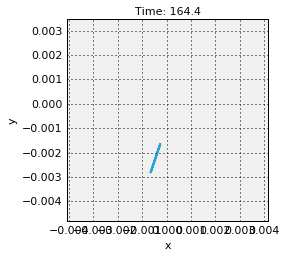
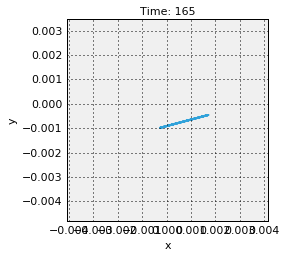
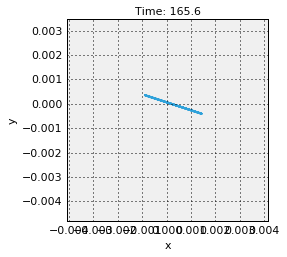
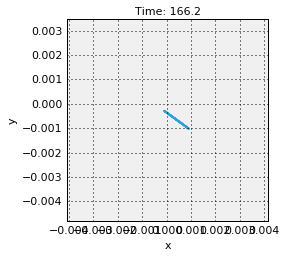
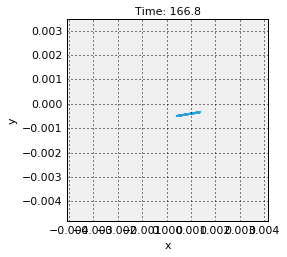
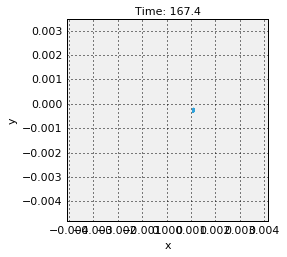
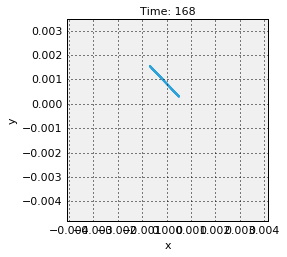
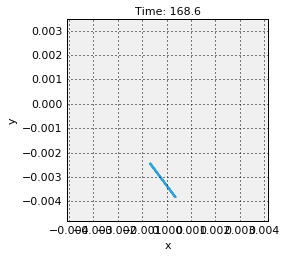
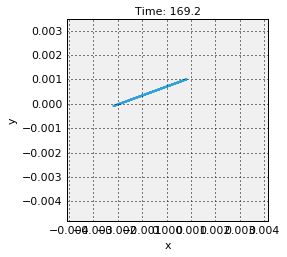
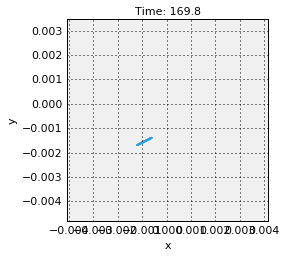
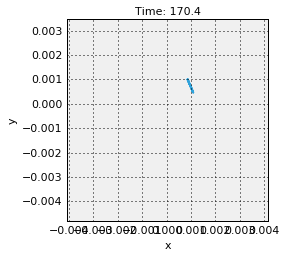
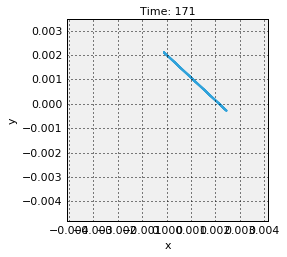
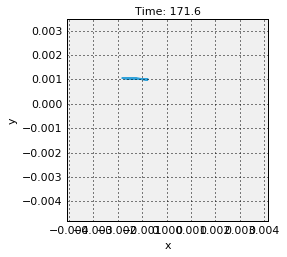
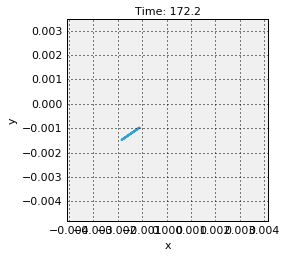
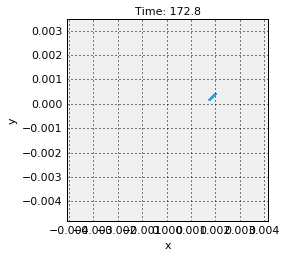
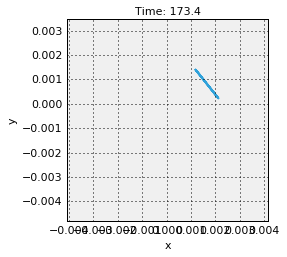
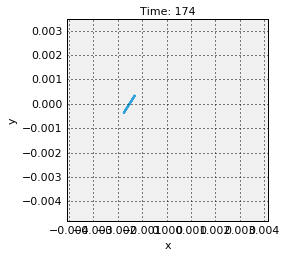
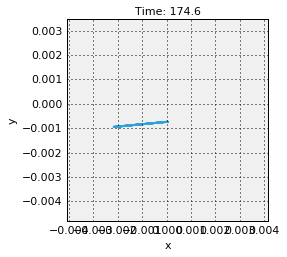
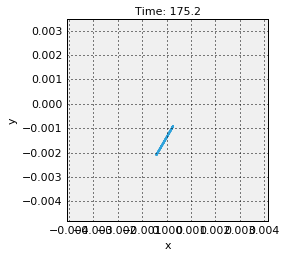
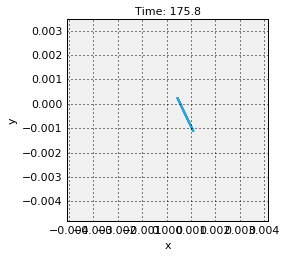
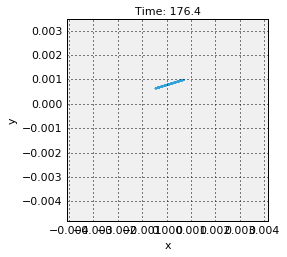
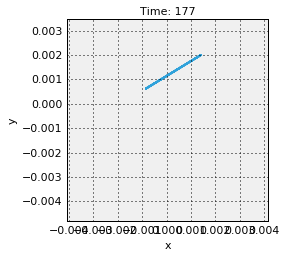
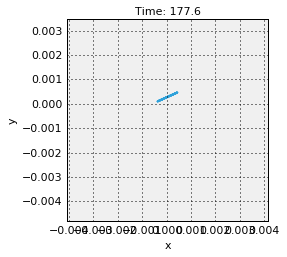
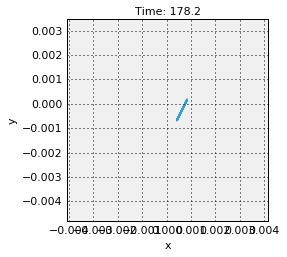
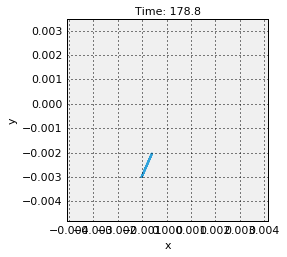
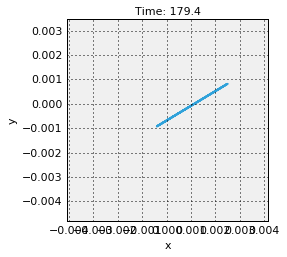
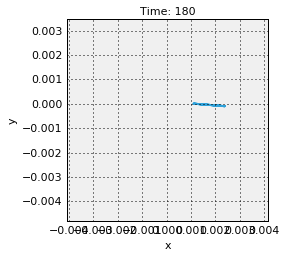
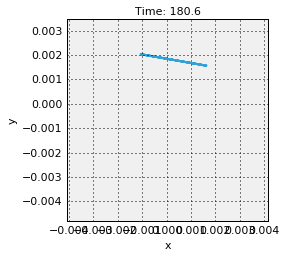
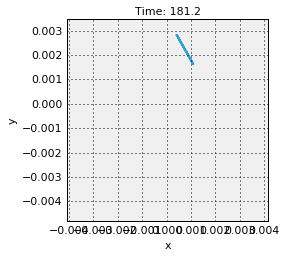
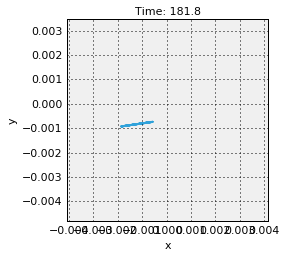
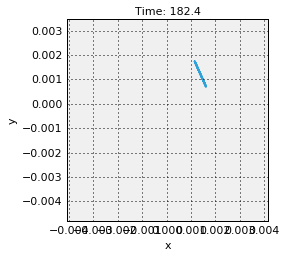
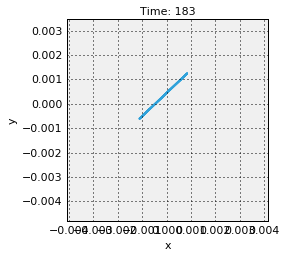
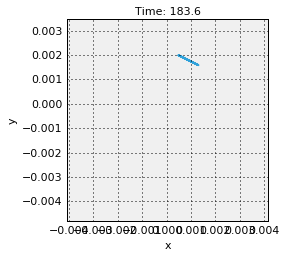
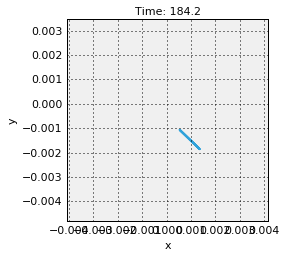
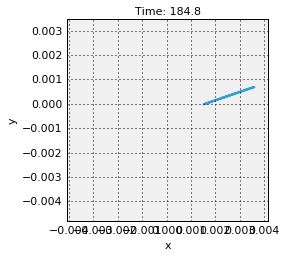
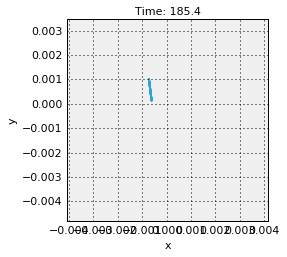
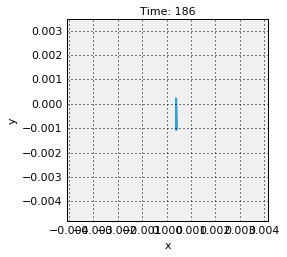
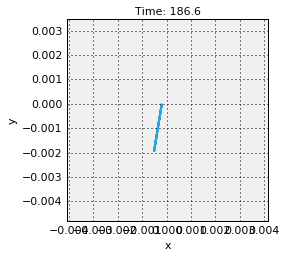
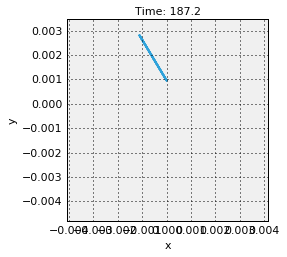
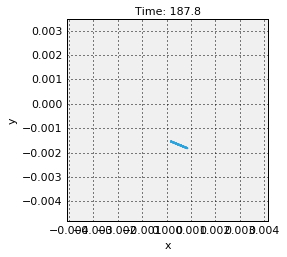
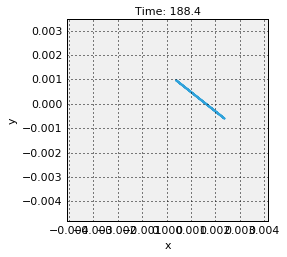
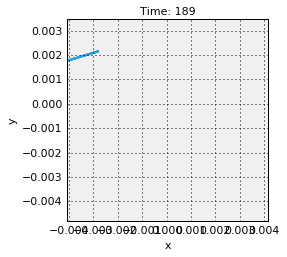
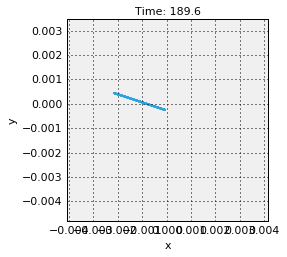
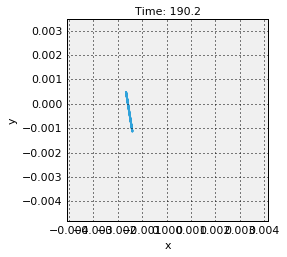
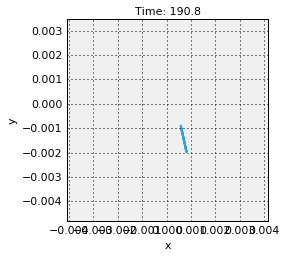
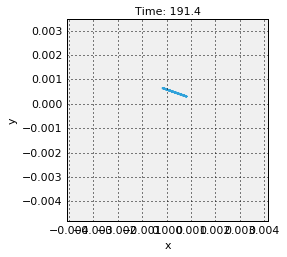
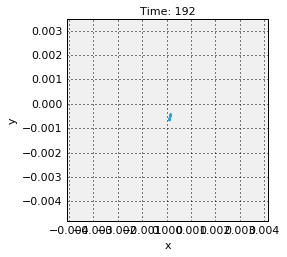
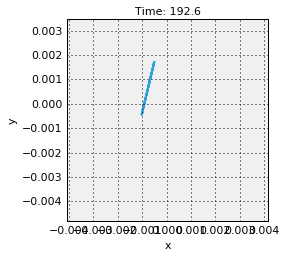
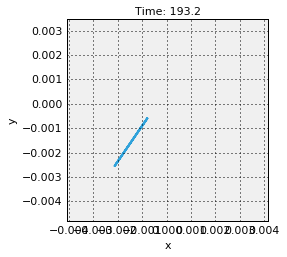
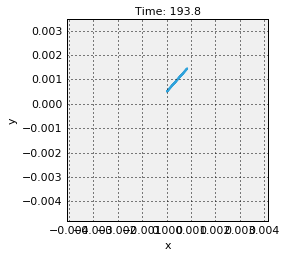
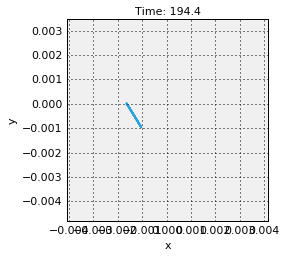
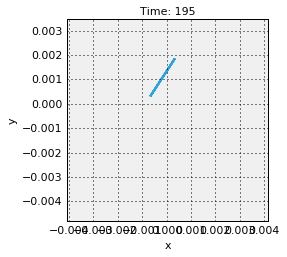
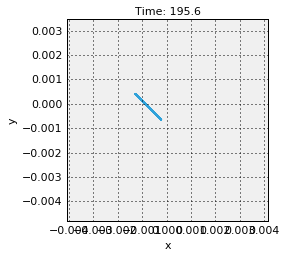
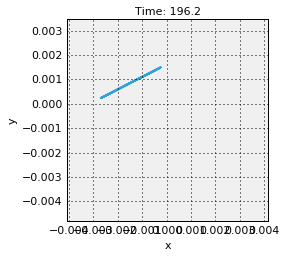
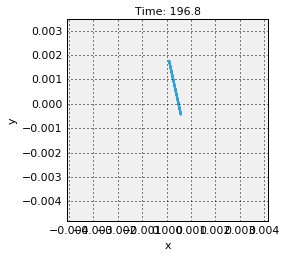
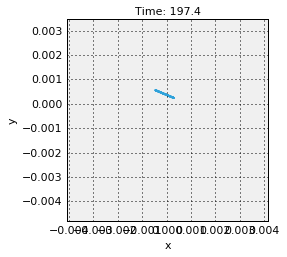
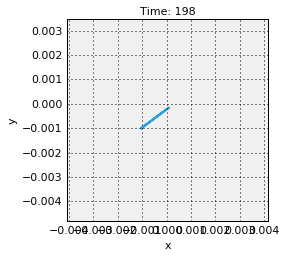
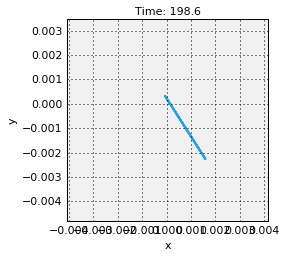
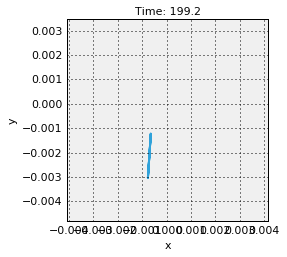
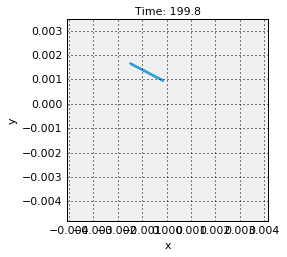
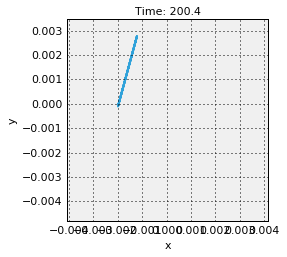
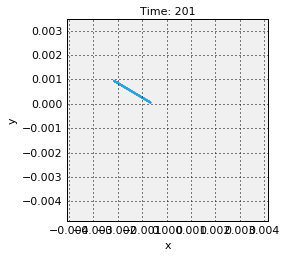
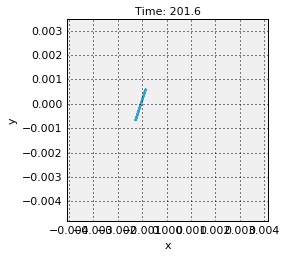
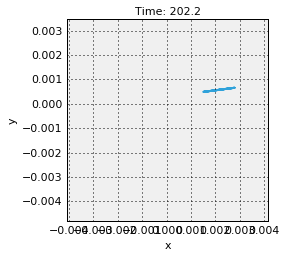
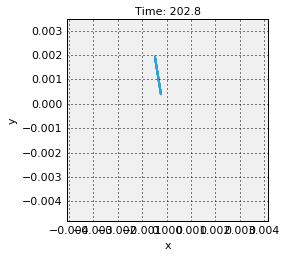
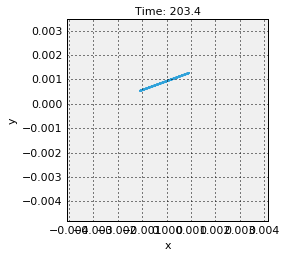
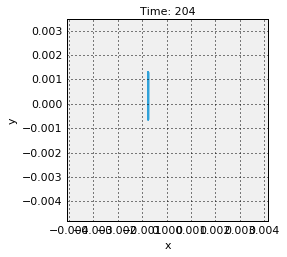
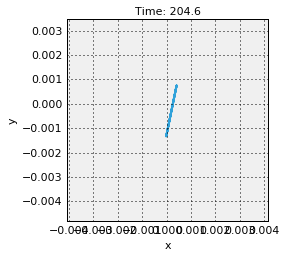
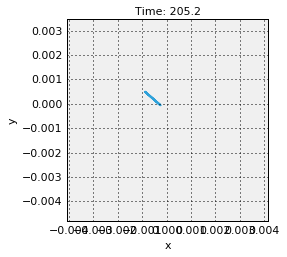
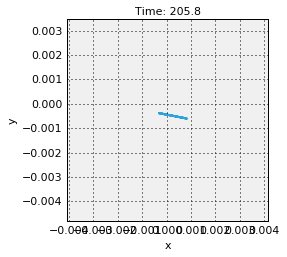
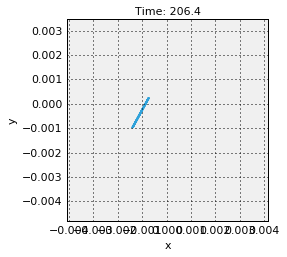
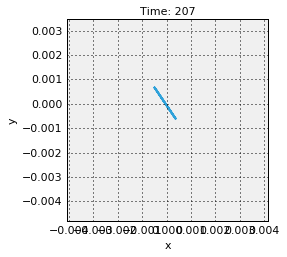
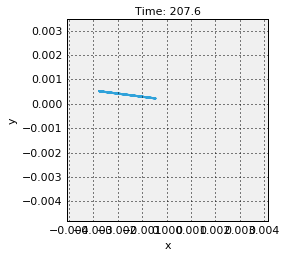
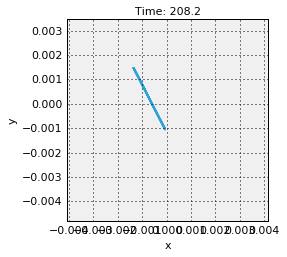
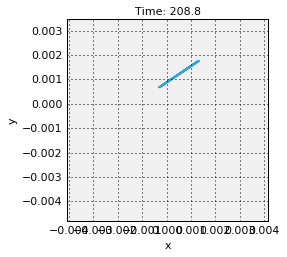
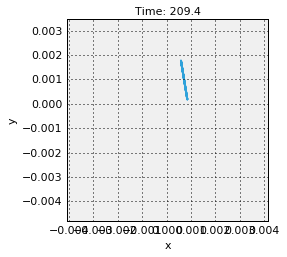
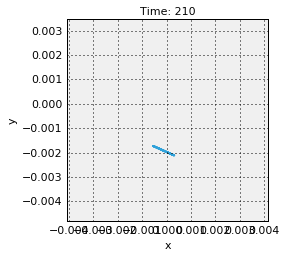
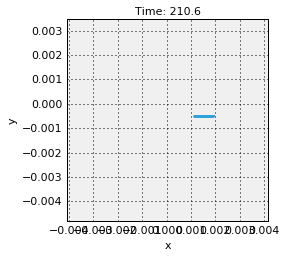
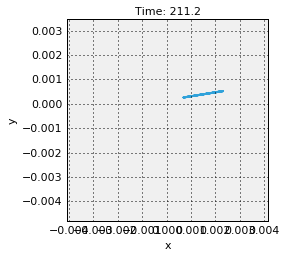
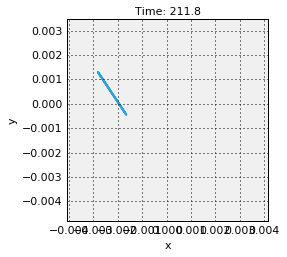
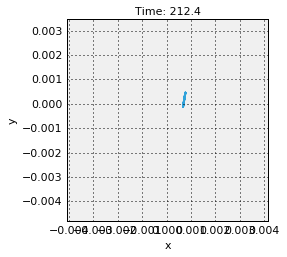
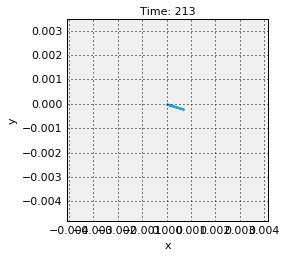
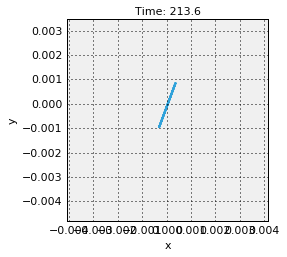
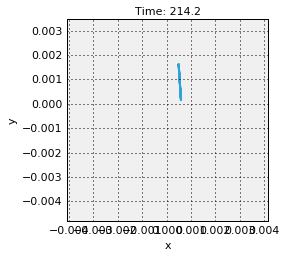
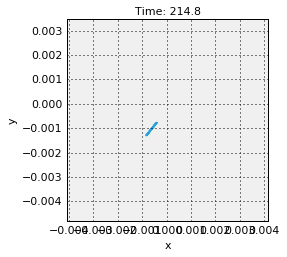
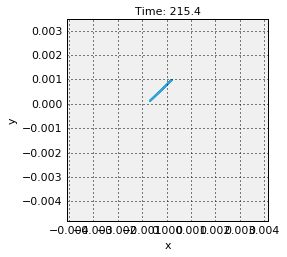
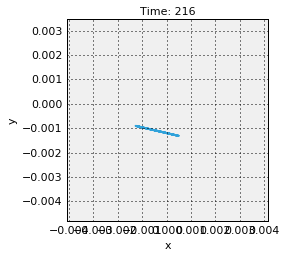
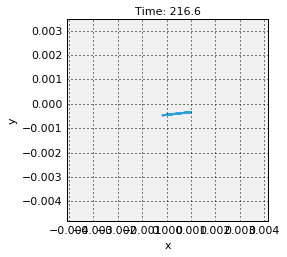
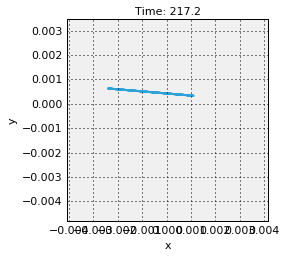
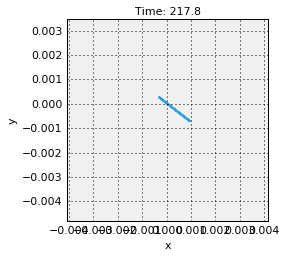
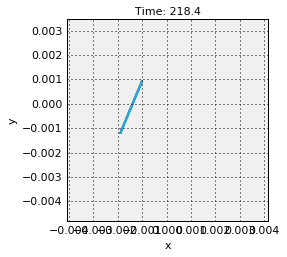
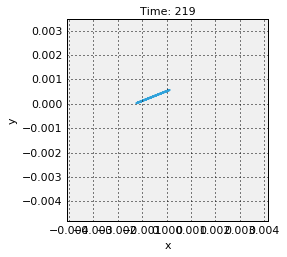
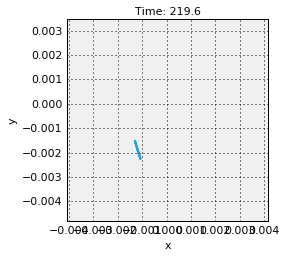
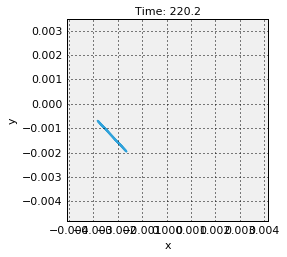
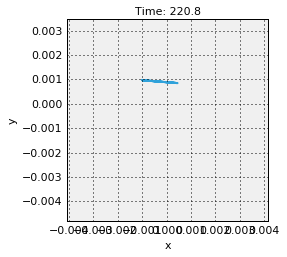
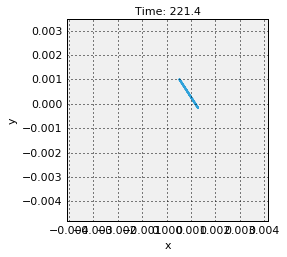
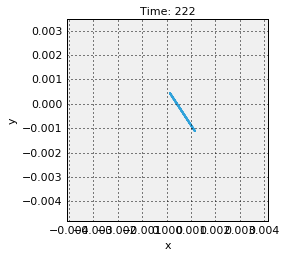
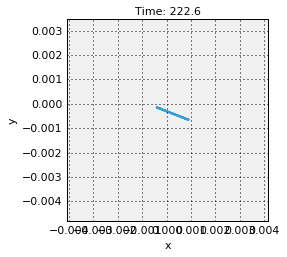
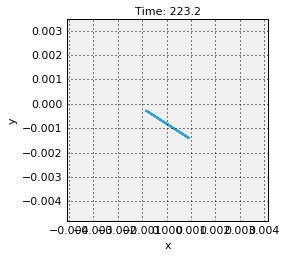
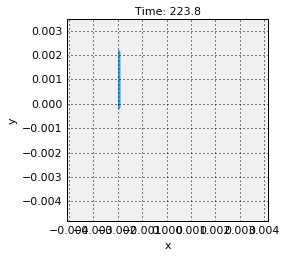
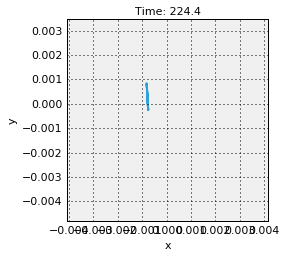
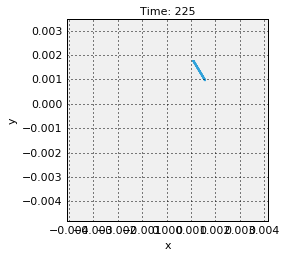
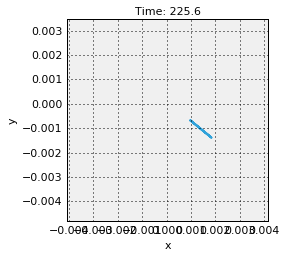
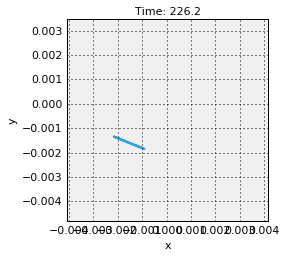
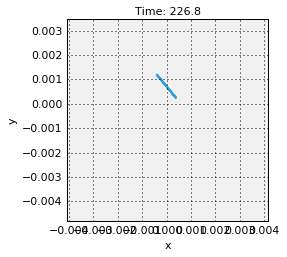
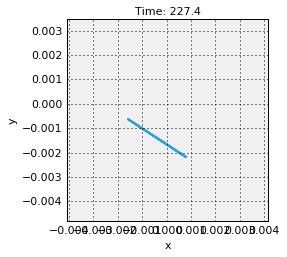
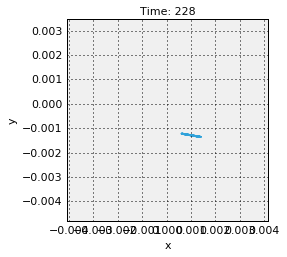
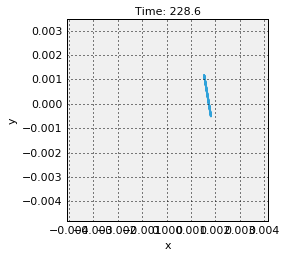
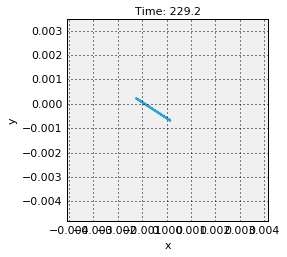
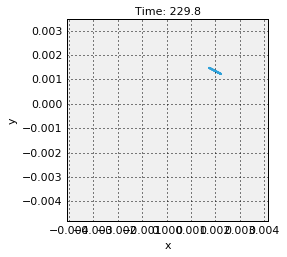
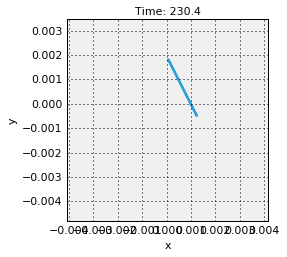
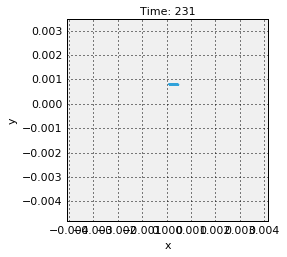
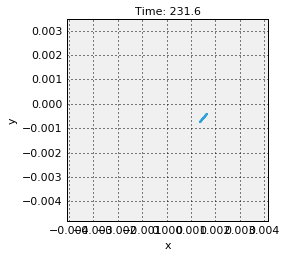
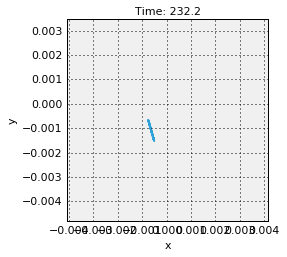
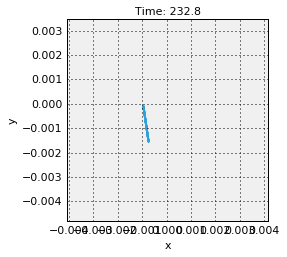
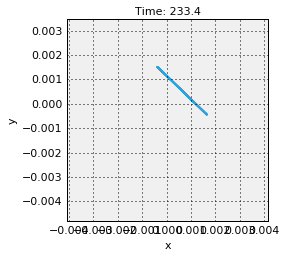
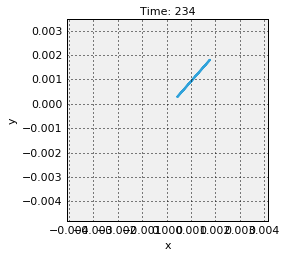
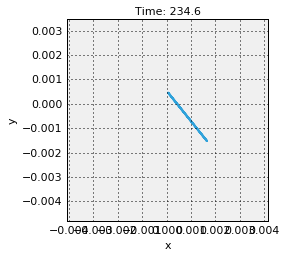
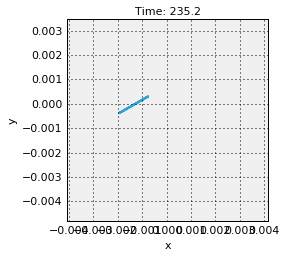
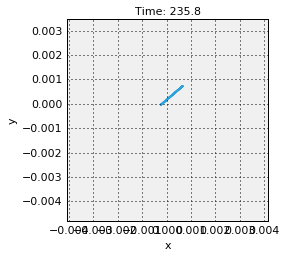
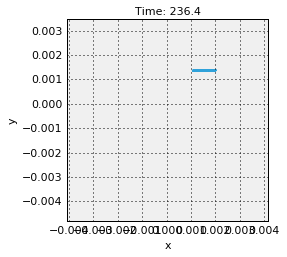
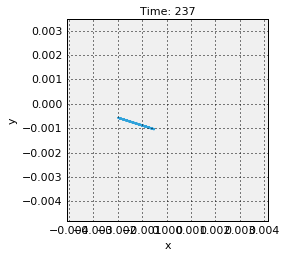
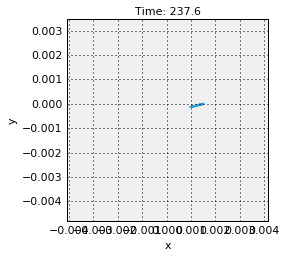
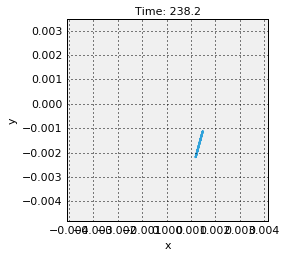
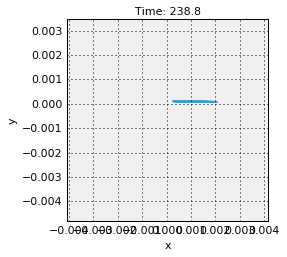
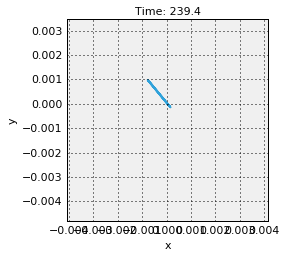
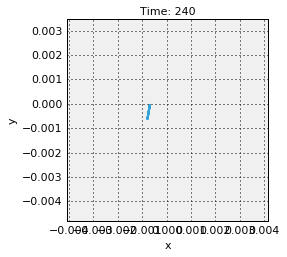
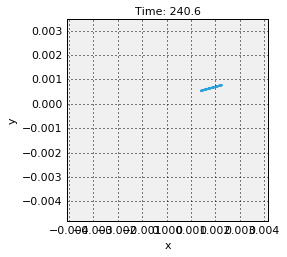
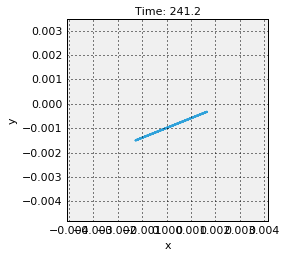
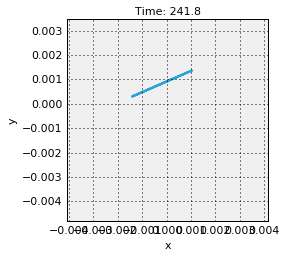
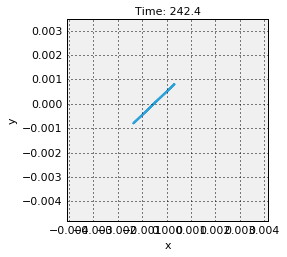
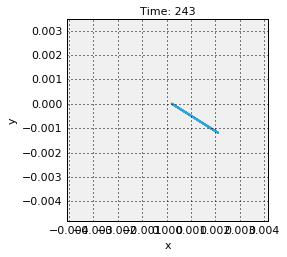
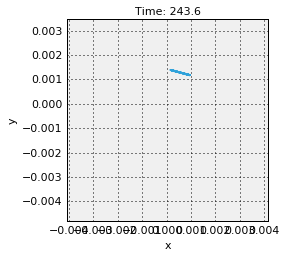
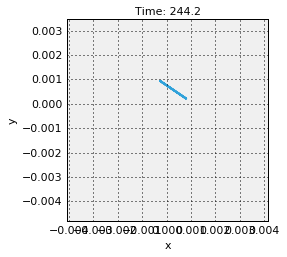
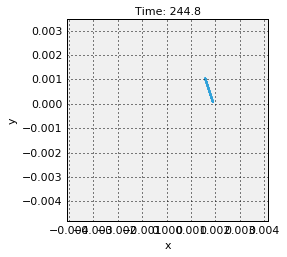
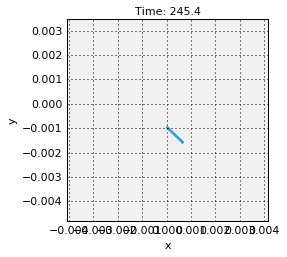
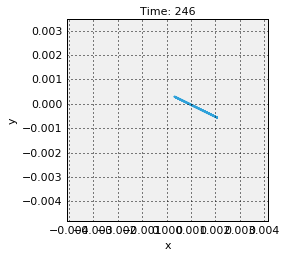
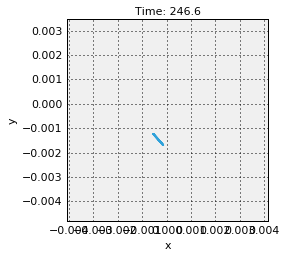
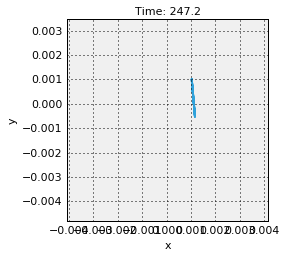
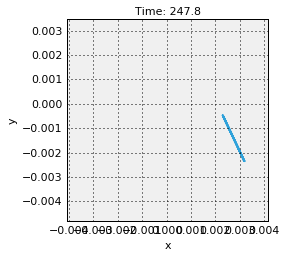
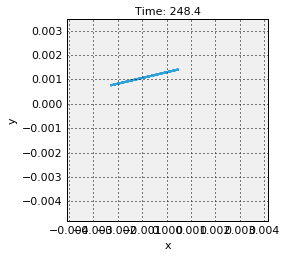
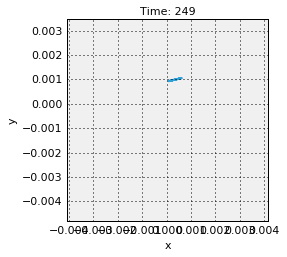
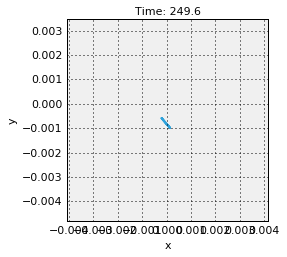
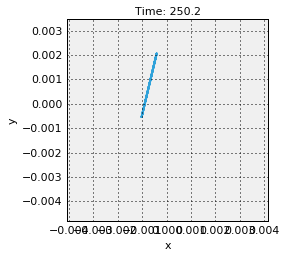
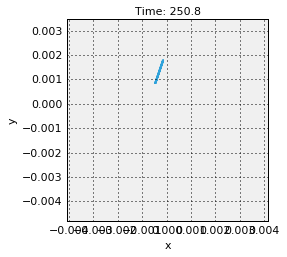
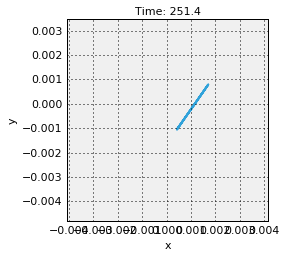
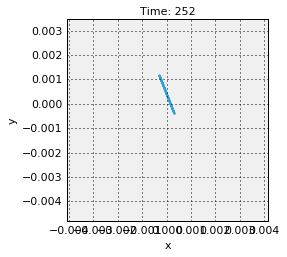
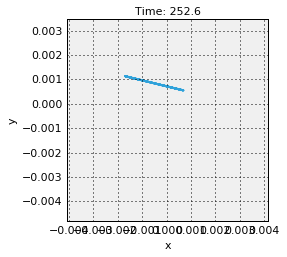
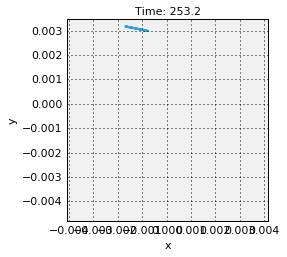
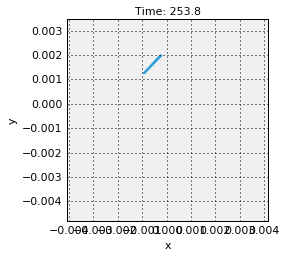
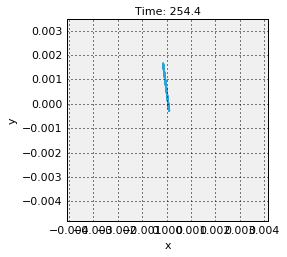
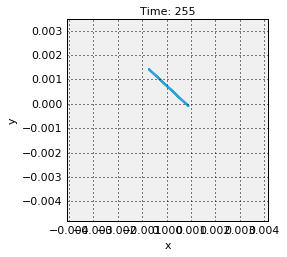
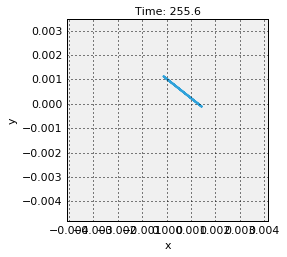
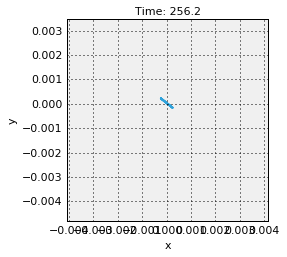
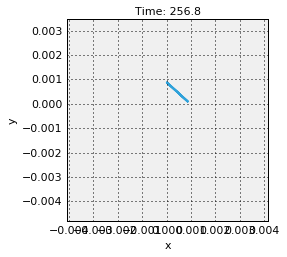
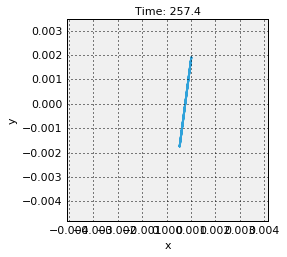
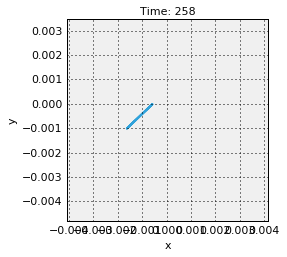
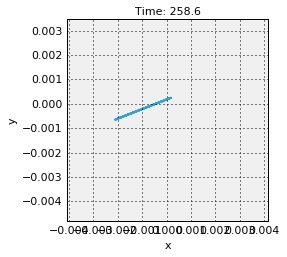
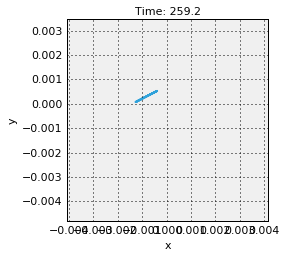
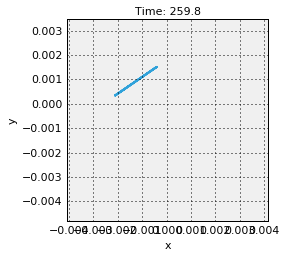
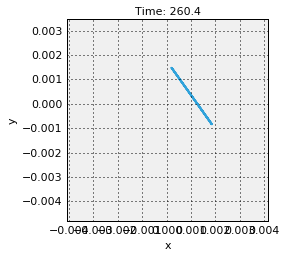
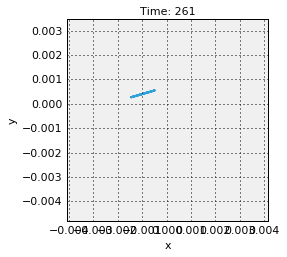
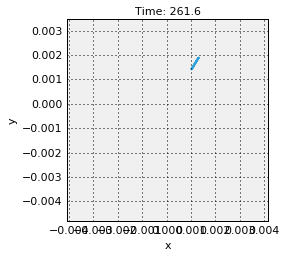
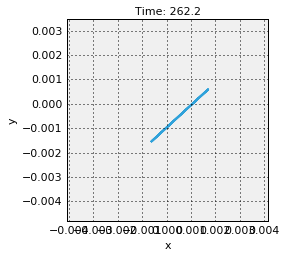
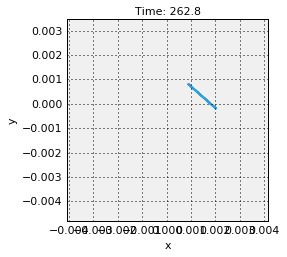
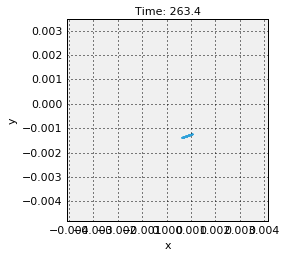
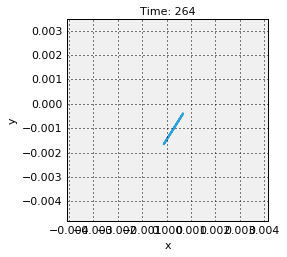
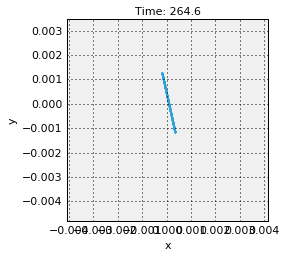
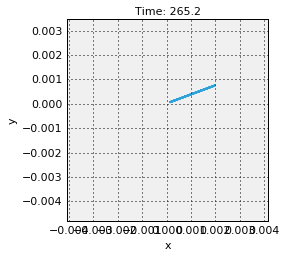
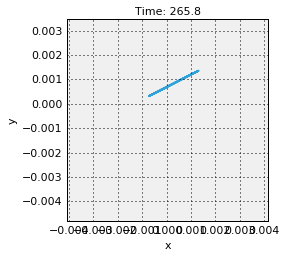
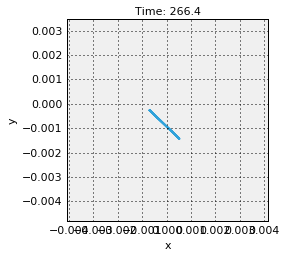
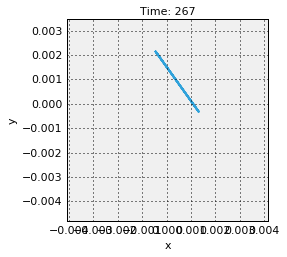
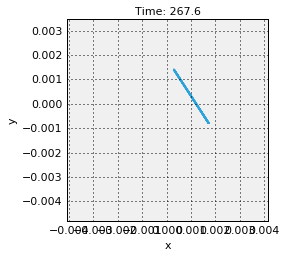
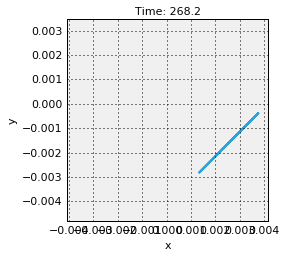
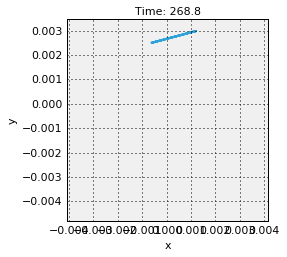
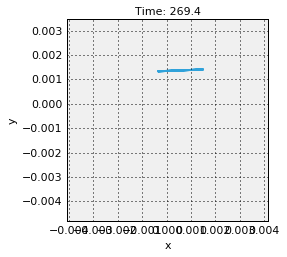
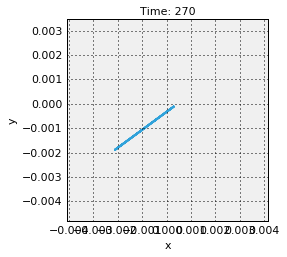
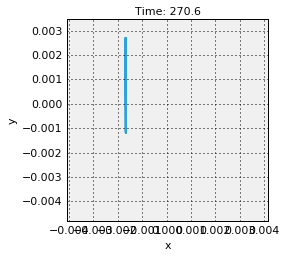
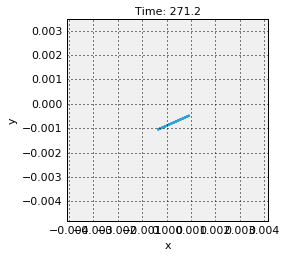
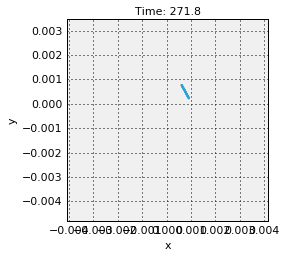
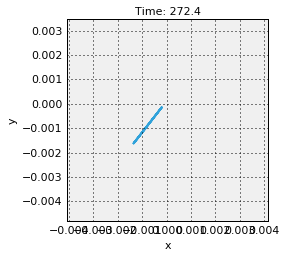
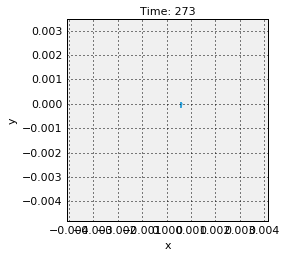
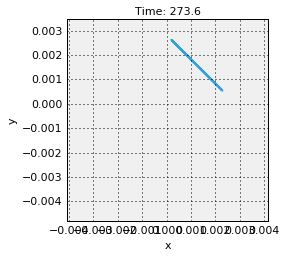
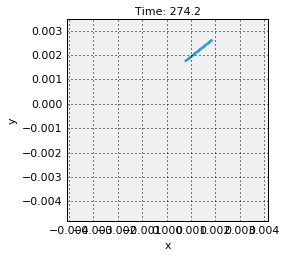
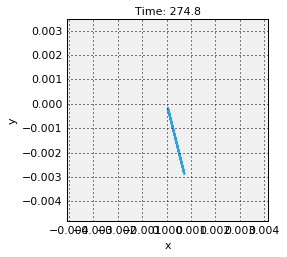
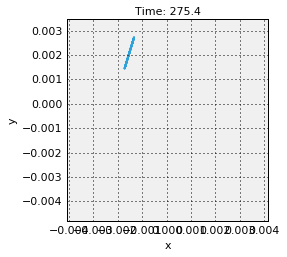
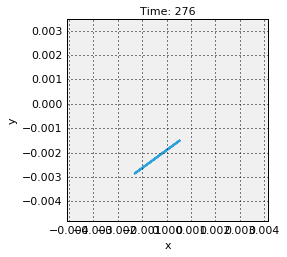
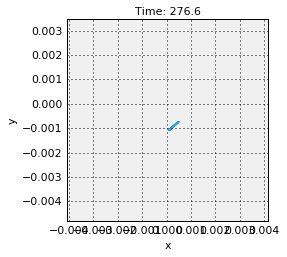
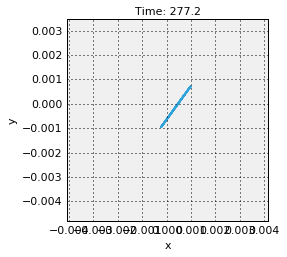
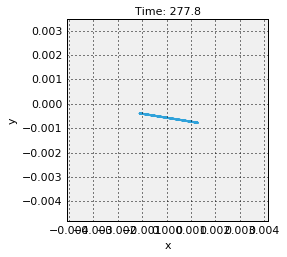
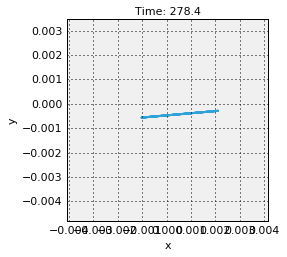
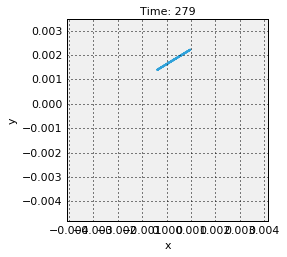
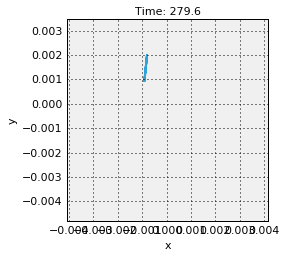
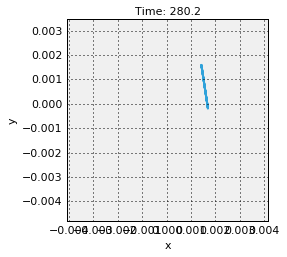
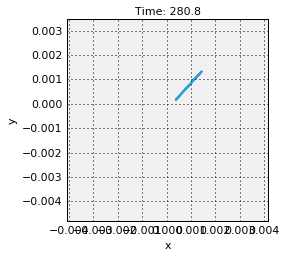
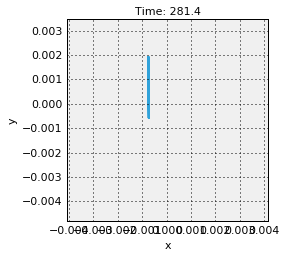
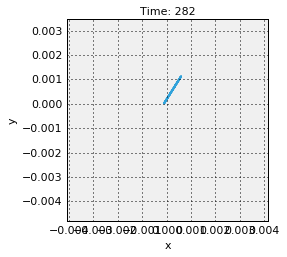
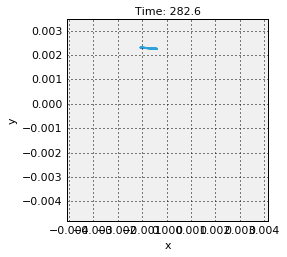
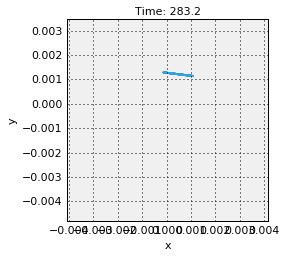
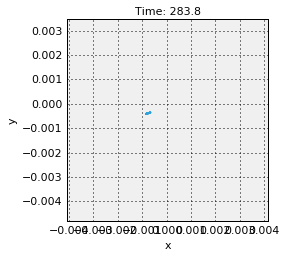
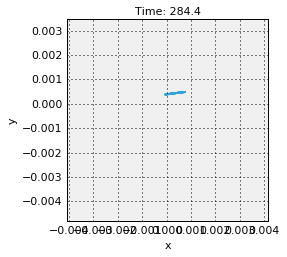
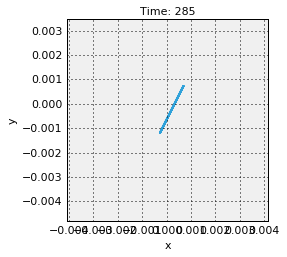
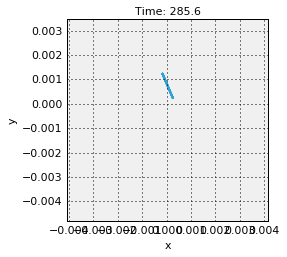
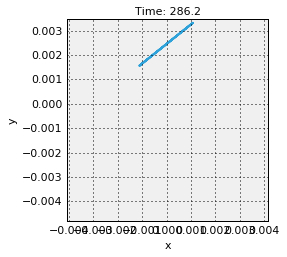
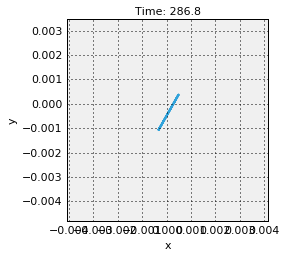
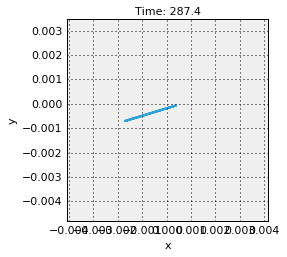
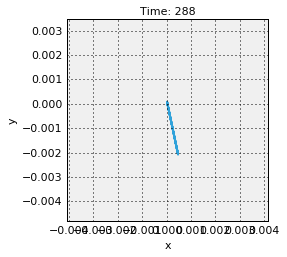
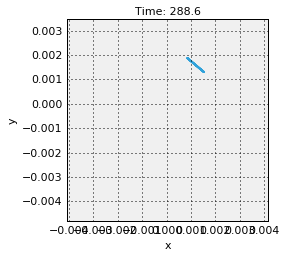
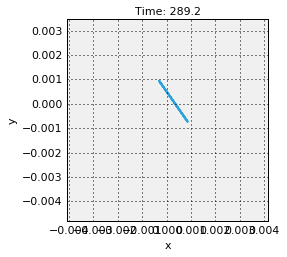
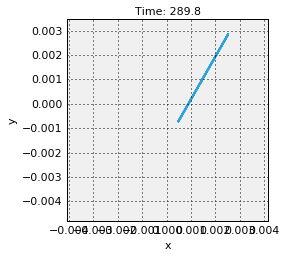
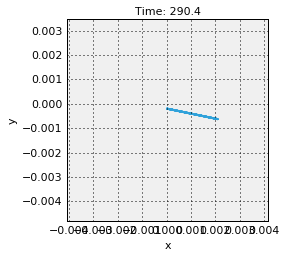
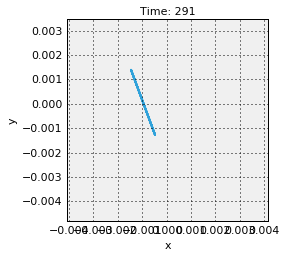
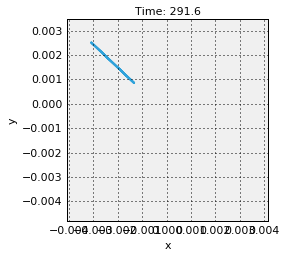
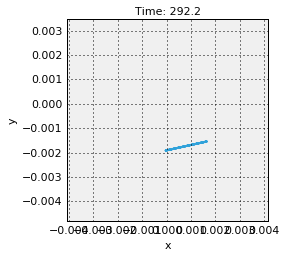
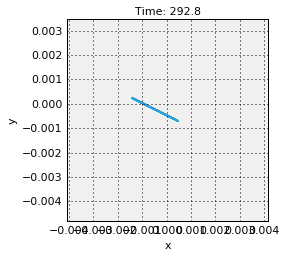
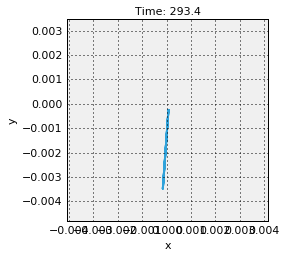
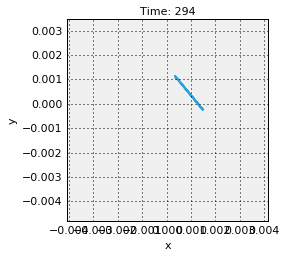
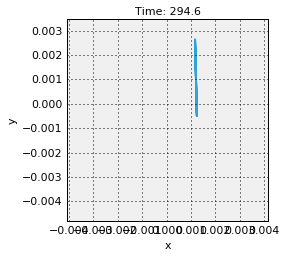
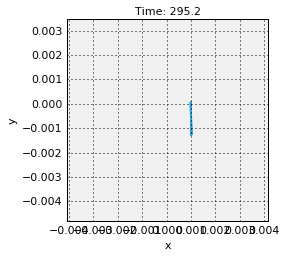
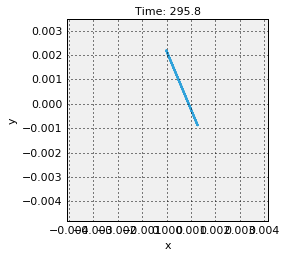
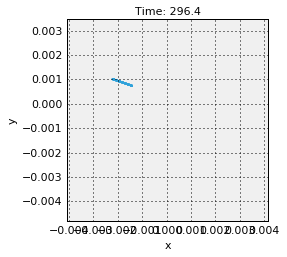
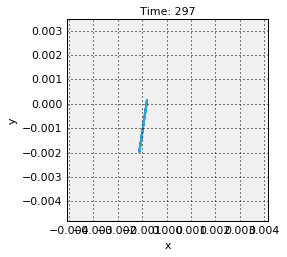
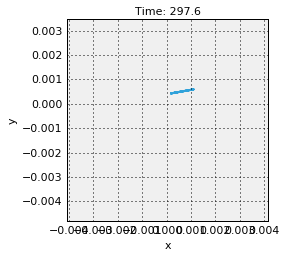
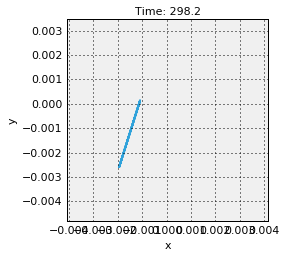
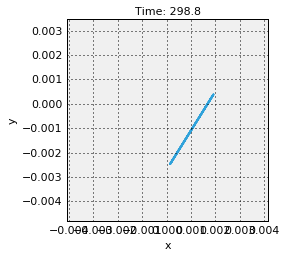

In [6]:
%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.real(psi_r[:, :, i])) * hv.Curve(V[:,:]))
            for i in range(0,steps-1)], kdims = ["Time"])